# Assignment

In [1]:
# Import 

import numpy as np
import matplotlib.pyplot as plt
from degree_freedom_queen import *
from degree_freedom_king1 import *
from degree_freedom_king2 import *
from generate_game import *
from Chess_env import *
import time
%matplotlib inline
plt.style.use("seaborn")
size_board = 4

In [12]:
!pip install qqdm prettytable
from qqdm.notebook import qqdm

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     -------------------------------------- 793.9/793.9 KB 3.9 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 8.1.1
    Uninstalling ipython-8.1.1:
      Successfully uninstalled ipython-8.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.


## The Environment

You can find the environment in the file Chess_env, which contains the class Chess_env. To define an object, you need to provide the board size considered as input. In our example, size_board=4. 
Chess_env is composed by the following methods:

1. Initialise_game. The method initialises an episode by placing the three pieces considered (Agent's king and queen, enemy's king) in the chess board. The outputs of the method are described below in order.

     S $\;$ A matrix representing the board locations filled with 4 numbers: 0, no piece in that position; 1, location of the 
     agent's king; 2 location of the queen; 3 location of the enemy king.
     
     X $\;$ The features, that is the input to the neural network. See the assignment for more information regarding the            definition of the features adopted. To personalise this, go into the Features method of the class Chess_env() and change        accordingly.
     
     allowed_a $\;$ The allowed actions that the agent can make. The agent is moving a king, with a total number of 8                possible actions, and a queen, with a total number of $(board_{size}-1)\times 8$ actions. The total number of possible actions correspond      to the sum of the two, but not all actions are allowed in a given position (movements to locations outside the borders or      against chess rules). Thus, the variable allowed_a is a vector that is one (zero) for an action that the agent can (can't)      make. Be careful, apply the policy considered on the actions that are allowed only.
     

2. OneStep. The method performs a one step update of the system. Given as input the action selected by the agent, it updates the chess board by performing that action and the response of the enemy king (which is a random allowed action in the settings considered). The first three outputs are the same as for the Initialise_game method, but the variables are computed for the position reached after the update of the system. The fourth and fifth outputs are:

     R $\;$ The reward. To change this, look at the OneStep method of the class where the rewards are set.
     
     Done $\;$ A variable that is 1 if the episode has ended (checkmate or draw).
     
     
3. Features. Given the chessboard position, the method computes the features.

This information and a quick analysis of the class should be all you need to get going. The other functions that the class exploits are uncommented and constitute an example on how not to write a python code. You can take a look at them if you want, but it is not necessary.






In [2]:
## INITIALISE THE ENVIRONMENT
env=Chess_Env(size_board)

In [3]:
## PRINT 5 STEPS OF AN EPISODE CONSIDERING A RANDOM AGENT

S,X,allowed_a=env.Initialise_game()                       # INTIALISE GAME

print(S)                                                  # PRINT CHESS BOARD (SEE THE DESCRIPTION ABOVE)

print('check? ',env.check)                                # PRINT VARIABLE THAT TELLS IF ENEMY KING IS IN CHECK (1) OR NOT (0)
print('dofk2 ',np.sum(env.dfk2_constrain).astype(int))    # PRINT THE NUMBER OF LOCATIONS THAT THE ENEMY KING CAN MOVE TO


for i in range(5):
    
    a,_=np.where(allowed_a==1)                  # FIND WHAT THE ALLOWED ACTIONS ARE
    a_agent=np.random.permutation(a)[0]         # MAKE A RANDOM ACTION

    S,X,allowed_a,R,Done=env.OneStep(a_agent)   # UPDATE THE ENVIRONMENT
    
    
    ## PRINT CHESS BOARD AND VARIABLES
    print('')
    print(S)
    print(R,'', Done)
    print('check? ',env.check)
    print('dofk2 ',np.sum(env.dfk2_constrain).astype(int))
    
    
    # TERMINATE THE EPISODE IF Done=True (DRAW OR CHECKMATE)
    if Done:
        break
        


[[0 0 0 3]
 [0 0 0 0]
 [0 0 2 0]
 [0 0 0 1]]
check?  0
dofk2  0

[[2 0 0 0]
 [0 0 0 3]
 [0 0 0 0]
 [0 0 0 1]]
0  0
check?  0
dofk2  1

[[0 0 0 3]
 [0 0 0 0]
 [0 0 2 0]
 [0 0 0 1]]
0  0
check?  0
dofk2  0

[[0 0 0 0]
 [0 0 0 3]
 [2 0 0 0]
 [0 0 0 1]]
0  0
check?  0
dofk2  2

[[0 0 0 3]
 [0 0 0 0]
 [2 0 0 0]
 [0 0 1 0]]
0  0
check?  0
dofk2  2

[[0 0 0 0]
 [0 0 3 0]
 [2 0 0 0]
 [0 0 0 1]]
0  0
check?  0
dofk2  3


In [47]:
# PERFORM N_episodes=1000 EPISODES MAKING RANDOM ACTIONS AND COMPUTE THE AVERAGE REWARD AND NUMBER OF MOVES 

S,X,allowed_a=env.Initialise_game()
N_episodes=10000

# VARIABLES WHERE TO SAVE THE FINAL REWARD IN AN EPISODE AND THE NUMBER OF MOVES 
R_save_random = np.zeros([N_episodes, 1])
N_moves_save_random = np.zeros([N_episodes, 1])
for n in qqdm(range(N_episodes)):
    
    S,X,allowed_a=env.Initialise_game()     # INITIALISE GAME
    Done=0                                  # SET Done=0 AT THE BEGINNING
    i=1                                     # COUNTER FOR THE NUMBER OF ACTIONS (MOVES) IN AN EPISODE
    
    # UNTIL THE EPISODE IS NOT OVER...(Done=0)
    while Done==0:
        
        # SAME AS THE CELL BEFORE, BUT SAVING THE RESULTS WHEN THE EPISODE TERMINATES 
        
        a,_=np.where(allowed_a==1)
        a_agent=np.random.choice(a)
        #print(a_agent)
        S,X,allowed_a,R,Done=env.OneStep(a_agent)
        
        
        if Done:
            R_save_random[n]=np.copy(R)
            N_moves_save_random[n]=np.copy(i)

            break

        i=i+1                               # UPDATE THE COUNTER

# AS YOU SEE, THE PERFORMANCE OF A RANDOM AGENT ARE NOT GREAT, SINCE THE MAJORITY OF THE POSITIONS END WITH A DRAW 
# (THE ENEMY KING IS NOT IN CHECK AND CAN'T MOVE)

print('Random_Agent, Average reward:',np.mean(R_save_random),'Number of steps: ',np.mean(N_moves_save_random))

random_score = np.mean(R_save_random)

    Iters       Elapsed Time       Speed                                                                                
 10000/10000  00:01:34<00:00:00  105.65it/s                                                                             

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

Random_Agent, Average reward: 0.2007 Number of steps:  6.9915


In [173]:
# INITIALISE THE PARAMETERS OF YOUR NEURAL NETWORK AND...
# PLEASE CONSIDER TO USE A MASK OF ONE FOR THE ACTION MADE AND ZERO OTHERWISE IF YOU ARE NOT USING VANILLA GRADIENT DESCENT...
# WE SUGGEST A NETWORK WITH ONE HIDDEN LAYER WITH SIZE 200. 


S,X,allowed_a=env.Initialise_game()
N_a=np.shape(allowed_a)[0]   # TOTAL NUMBER OF POSSIBLE ACTIONS

N_in=np.shape(X)[0]    ## INPUT SIZE
N_h=200                ## NUMBER OF HIDDEN NODES


## INITALISE YOUR NEURAL NETWORK...


# HYPERPARAMETERS SUGGESTED (FOR A GRID SIZE OF 4)

epsilon_0 = 0.2     # STARTING VALUE OF EPSILON FOR THE EPSILON-GREEDY POLICY
beta = 0.00005      # THE PARAMETER SETS HOW QUICKLY THE VALUE OF EPSILON IS DECAYING (SEE epsilon_f BELOW)
gamma = 0.85        # THE DISCOUNT FACTOR
eta = 0.0035        # THE LEARNING RATE

N_episodes = 100000 # THE NUMBER OF GAMES TO BE PLAYED 

# SAVING VARIABLES
R_save = np.zeros([N_episodes, 1])
N_moves_save = np.zeros([N_episodes, 1])


### SARSA Algorithm

In [30]:
env.Features()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0.])

In [31]:
def convert_key(state,action):
    assert isinstance(state,np.ndarray)
    return (tuple(state.flatten().tolist()),action)

In [32]:
def epsilon_greedy(Q,epsilon,state,action_list):
    if np.random.uniform(0,1) < epsilon:
        return np.random.choice(action_list)
    else:
        max_action = None
        max_action_value = -1
        #print(action_list)
        for action in action_list:
            k = convert_key(state,action)
            if Q[k] > max_action_value:
                max_action_value = Q[k]
                max_action = action
        assert max_action != None
        return max_action

In [33]:
def SARSA(alpha,gamma,epsilon,iters = 100000,seed = 10,beta = 0):
    print("                       #### START SARSA ALGORITHM ####                      ")
    algorithm_paramters = f"""
    Algorithm parameters contain 
    alpha : {alpha}
    gamma : {gamma}
    epsilon : {epsilon}
    
    """
    print(algorithm_paramters)
    Q   = {}  ## Qtable
    bar = qqdm(range(iters))
    win_array = np.zeros(iters)
    sum_reward= 0.0
    win_num   = 0.0
    rng       = np.random.RandomState(seed)
    game_step = np.zeros(iters)
    time_list = []
    for n in bar:
    
        epsilon = epsilon / (1 + beta * n)   ## DECAYING EPSILON
        Done=0                                    ## SET DONE TO ZERO (BEGINNING OF THE EPISODE)
        i = 1                                     ## COUNTER FOR NUMBER OF ACTIONS
        S,X,allowed_a=env.Initialise_game()
        a,_          = np.where(allowed_a==1)
        for item in a:
            k = convert_key(S,item)
            Q[k] = rng.rand(1)[0]/1000

        action = epsilon_greedy(Q,epsilon,S,a)
        tmp_reward = 0.0
        step      = 0
        start     = time.time()
        while Done==0:          
            ## THIS IS A RANDOM AGENT, CHANGE IT...
            S_next,X_next,allowed_a_next,R,Done = env.OneStep(action)
            if Done:
                a = []
            else:
                a,_           = np.where(allowed_a_next==1)

            for item in a:
                k = convert_key(S_next,item)
                if k not in Q.keys():
                    Q[k] = rng.rand(1)[0]/1000

            if not(Done):
                nextaction           = epsilon_greedy(Q,epsilon,S_next,a)
            else:
                nextaction           = None
            current_key = convert_key(S,action)
            if current_key not in Q.keys():
                Q[current_key] = rng.rand(1)[0]/1000
            ### update Q table 
            if not(Done):
                next_key = convert_key(S_next,nextaction)
                Q[current_key] += alpha * (R + gamma * Q[next_key] - Q[current_key])
            else:
                Q[current_key] += alpha * (R - Q[current_key])

            if Done:
                if R == 1: ### win 
                    win_num += 1
                    tmp_reward+= R
                    win_array[n]= 1 
                break
            else:
                ## ONLY TO PUT SUMETHING
                PIPPO=1
            ## THE EPISODE HAS ENDED, UPDATE...BE CAREFUL, THIS IS THE LAST STEP OF THE EPISODE
            step   += 1
            action = nextaction
            S=np.copy(S_next)
            X=np.copy(X_next)
            #allowed_a=np.copy(allowed_a_next)

            i += 1  # UPDATE COUNTER FOR NUMBER OF ACTIONS
        end    = time.time()
        time_list.append(end - start)
        game_step[n]=step
        sum_reward += tmp_reward
        bar.set_infos(
            {
                    "round-reward":tmp_reward,
                    "reward":sum_reward,
                    "iters":n + 1,
                    "win_ratio":win_num/(n + 1)
            }
        )
            # NEXT STATE AND CO. BECOME ACTUAL STATE...  
    history = {
        "win_array":win_array,
        "Qtable"   :Q,
        "sum_reward" : sum_reward,
        "win_num" : win_num,
        "time" : time_list,
        "game_step" : game_step
    }
    
    print("                        #### END SARSA ALGORITHM ####                         ")
    return history

In [178]:
import copy
history = SARSA(
    alpha = 0.8,
    epsilon=copy.copy(epsilon_0),
    gamma = gamma,
    beta  = beta,
    seed  = 20,
    iters = N_episodes
    
)

                       #### START SARSA ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.8
    gamma : 0.85
    epsilon : 0.2
    
    


     Iters        Elapsed Time       Speed    round-reward  reward   iters   win_ratio                                  
 100000/100000  00:23:54<00:00:00  69.69it/s      0.0       71284.0  100000   0.71284                                   

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END SARSA ALGORITHM ####                         


In [16]:
def compute_ratio(win_array,step = 10):
    ratio = []
    for i in range(0,len(win_array),step):
        ratio.append(np.mean(win_array[i : i + step]))
    return np.array(ratio)

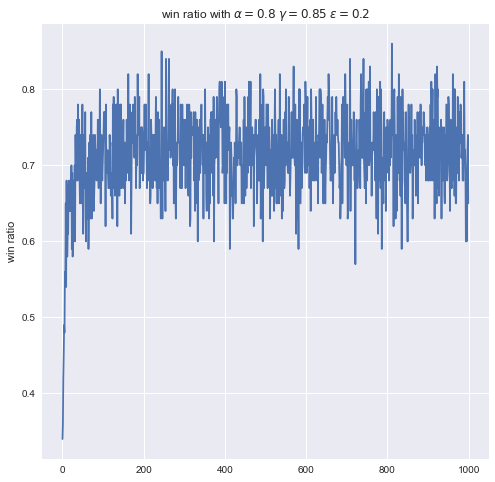

In [191]:
plt.figure(figsize = (8,8))
plt.title(r"win ratio with $ \alpha = 0.8 $ $ \gamma = 0.85$ $\epsilon = 0.2$")
plt.plot(compute_ratio(history['win_array'],100))
plt.ylabel(" win ratio ")
plt.savefig("sarsa1.jpg")
plt.show()

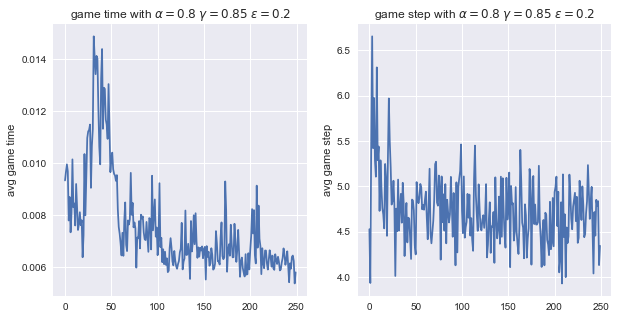

In [200]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title(r"game time with $ \alpha = 0.8 $ $ \gamma = 0.85$ $\epsilon = 0.2$")
plt.plot(compute_ratio(history['time'],400))
plt.ylabel(" avg game time ")
plt.subplot(1,2,2)
plt.title(r"game step with $ \alpha = 0.8 $ $ \gamma = 0.85$ $\epsilon = 0.2$")
plt.plot(compute_ratio(history['game_step'],400))
plt.ylabel(" avg game step ")
plt.savefig("sarsa_game_step_time.jpg")
plt.show()

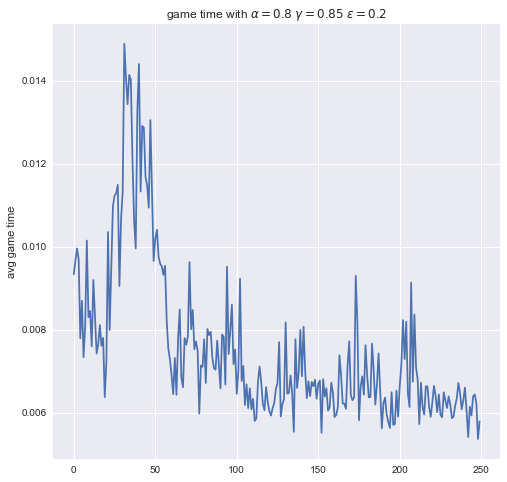

In [195]:

plt.savefig("sarsa_game_time.jpg")
plt.show()

### Some parameters

In [34]:
seed         = 20220319
history_list = [] 
parameters   = [
                 (0.9,0.8,0.3),
                 (0.7,0.8,0.3),
                 (0.3,0.8,0.3),
                 (0.9,0.3,0.3),
                 (0.9,0.6,0.3),
                (0.9,1.0,0.3),
                (0.95,0.85,0.1),
                (0.95,0.85,0.4),
                (0.95,0.85,0.6)
               ] ### Some parameters
for param in parameters:
    history_list.append(
        SARSA(
            alpha = param[0],
            gamma = param[1],
            epsilon=param[2],
            iters=10000 ,
            seed = seed,
            beta = 0
        )
    )

                       #### START SARSA ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.9
    gamma : 0.8
    epsilon : 0.3
    
    


    Iters       Elapsed Time       Speed     round-reward  reward  iters  win_ratio                                     
 10000/10000  00:01:22<00:00:00  120.92it/s      1.0       5564.0  10000   0.5564                                       

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END SARSA ALGORITHM ####                         
                       #### START SARSA ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.7
    gamma : 0.8
    epsilon : 0.3
    
    


    Iters       Elapsed Time       Speed     round-reward  reward  iters  win_ratio                                     
 10000/10000  00:01:21<00:00:00  123.24it/s      1.0       5674.0  10000   0.5674                                       

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END SARSA ALGORITHM ####                         
                       #### START SARSA ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.3
    gamma : 0.8
    epsilon : 0.3
    
    


    Iters       Elapsed Time       Speed     round-reward  reward  iters  win_ratio                                     
 10000/10000  00:01:16<00:00:00  130.00it/s      1.0       5739.0  10000   0.5739                                       

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END SARSA ALGORITHM ####                         
                       #### START SARSA ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.9
    gamma : 0.3
    epsilon : 0.3
    
    


    Iters       Elapsed Time       Speed     round-reward  reward  iters  win_ratio                                     
 10000/10000  00:01:10<00:00:00  141.97it/s      0.0       5548.0  10000   0.5548                                       

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END SARSA ALGORITHM ####                         
                       #### START SARSA ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.9
    gamma : 0.6
    epsilon : 0.3
    
    


    Iters       Elapsed Time       Speed     round-reward  reward  iters  win_ratio                                     
 10000/10000  00:01:19<00:00:00  126.28it/s      0.0       5597.0  10000   0.5597                                       

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END SARSA ALGORITHM ####                         
                       #### START SARSA ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.9
    gamma : 1.0
    epsilon : 0.3
    
    


    Iters       Elapsed Time       Speed     round-reward  reward  iters  win_ratio                                     
 10000/10000  00:01:32<00:00:00  107.78it/s      1.0       5431.0  10000   0.5431                                       

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END SARSA ALGORITHM ####                         
                       #### START SARSA ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.95
    gamma : 0.85
    epsilon : 0.1
    
    


    Iters       Elapsed Time       Speed    round-reward  reward  iters  win_ratio                                      
 10000/10000  00:01:40<00:00:00  99.35it/s      1.0       6291.0  10000   0.6291                                        

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END SARSA ALGORITHM ####                         
                       #### START SARSA ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.95
    gamma : 0.85
    epsilon : 0.4
    
    


    Iters       Elapsed Time       Speed     round-reward  reward  iters  win_ratio                                     
 10000/10000  00:01:30<00:00:00  110.86it/s      0.0       4996.0  10000   0.4996                                       

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END SARSA ALGORITHM ####                         
                       #### START SARSA ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.95
    gamma : 0.85
    epsilon : 0.6
    
    


    Iters       Elapsed Time       Speed     round-reward  reward  iters  win_ratio                                     
 10000/10000  00:01:33<00:00:00  106.39it/s      0.0       3729.0  10000   0.3729                                       

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END SARSA ALGORITHM ####                         


For example, if our algorithm runs 10,000 times and we set $n = 10$, then we choose $10$ as the step size and choose $10$ rounds each time to see the percentage of winners in these ten rounds.
The code implementation is as follows:

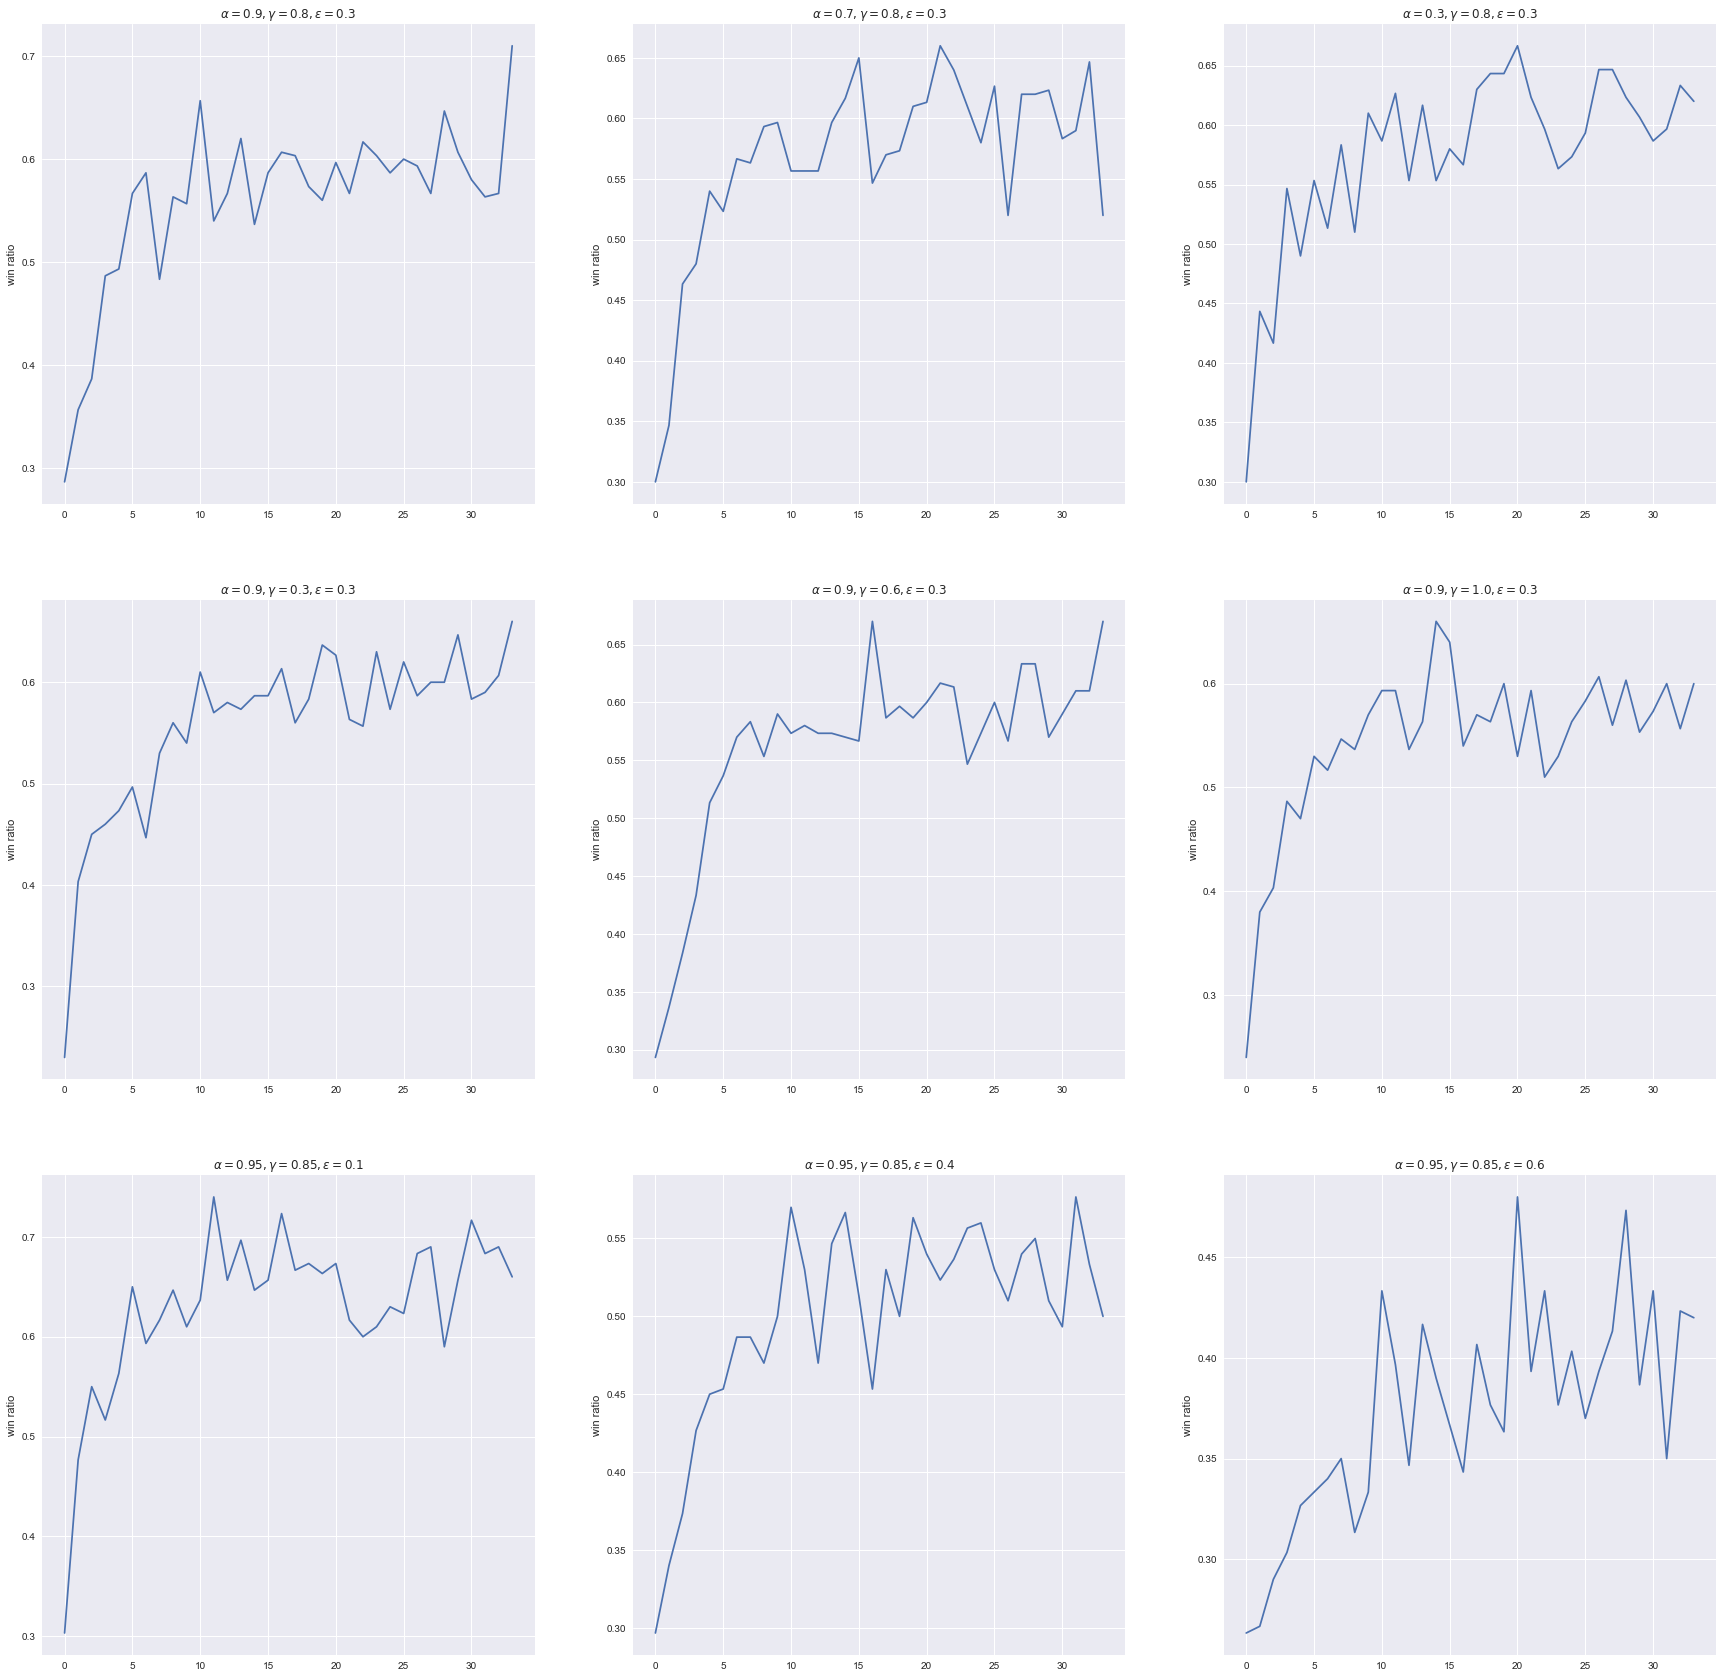

In [35]:
plt.figure(figsize = (30,30))
for i in range(9):
    plt.subplot(3,3,i + 1)
    history = history_list[i]
    param   = parameters[i]
    ratio   = compute_ratio(history['win_array'],300)
    title   = fr"$\alpha = {param[0]},\gamma = {param[1]},\epsilon = {param[2]}$"
    plt.title(title)
    plt.plot(ratio)
    plt.ylabel("win ratio")
plt.savefig("sarsa_mutiparame.jpg")

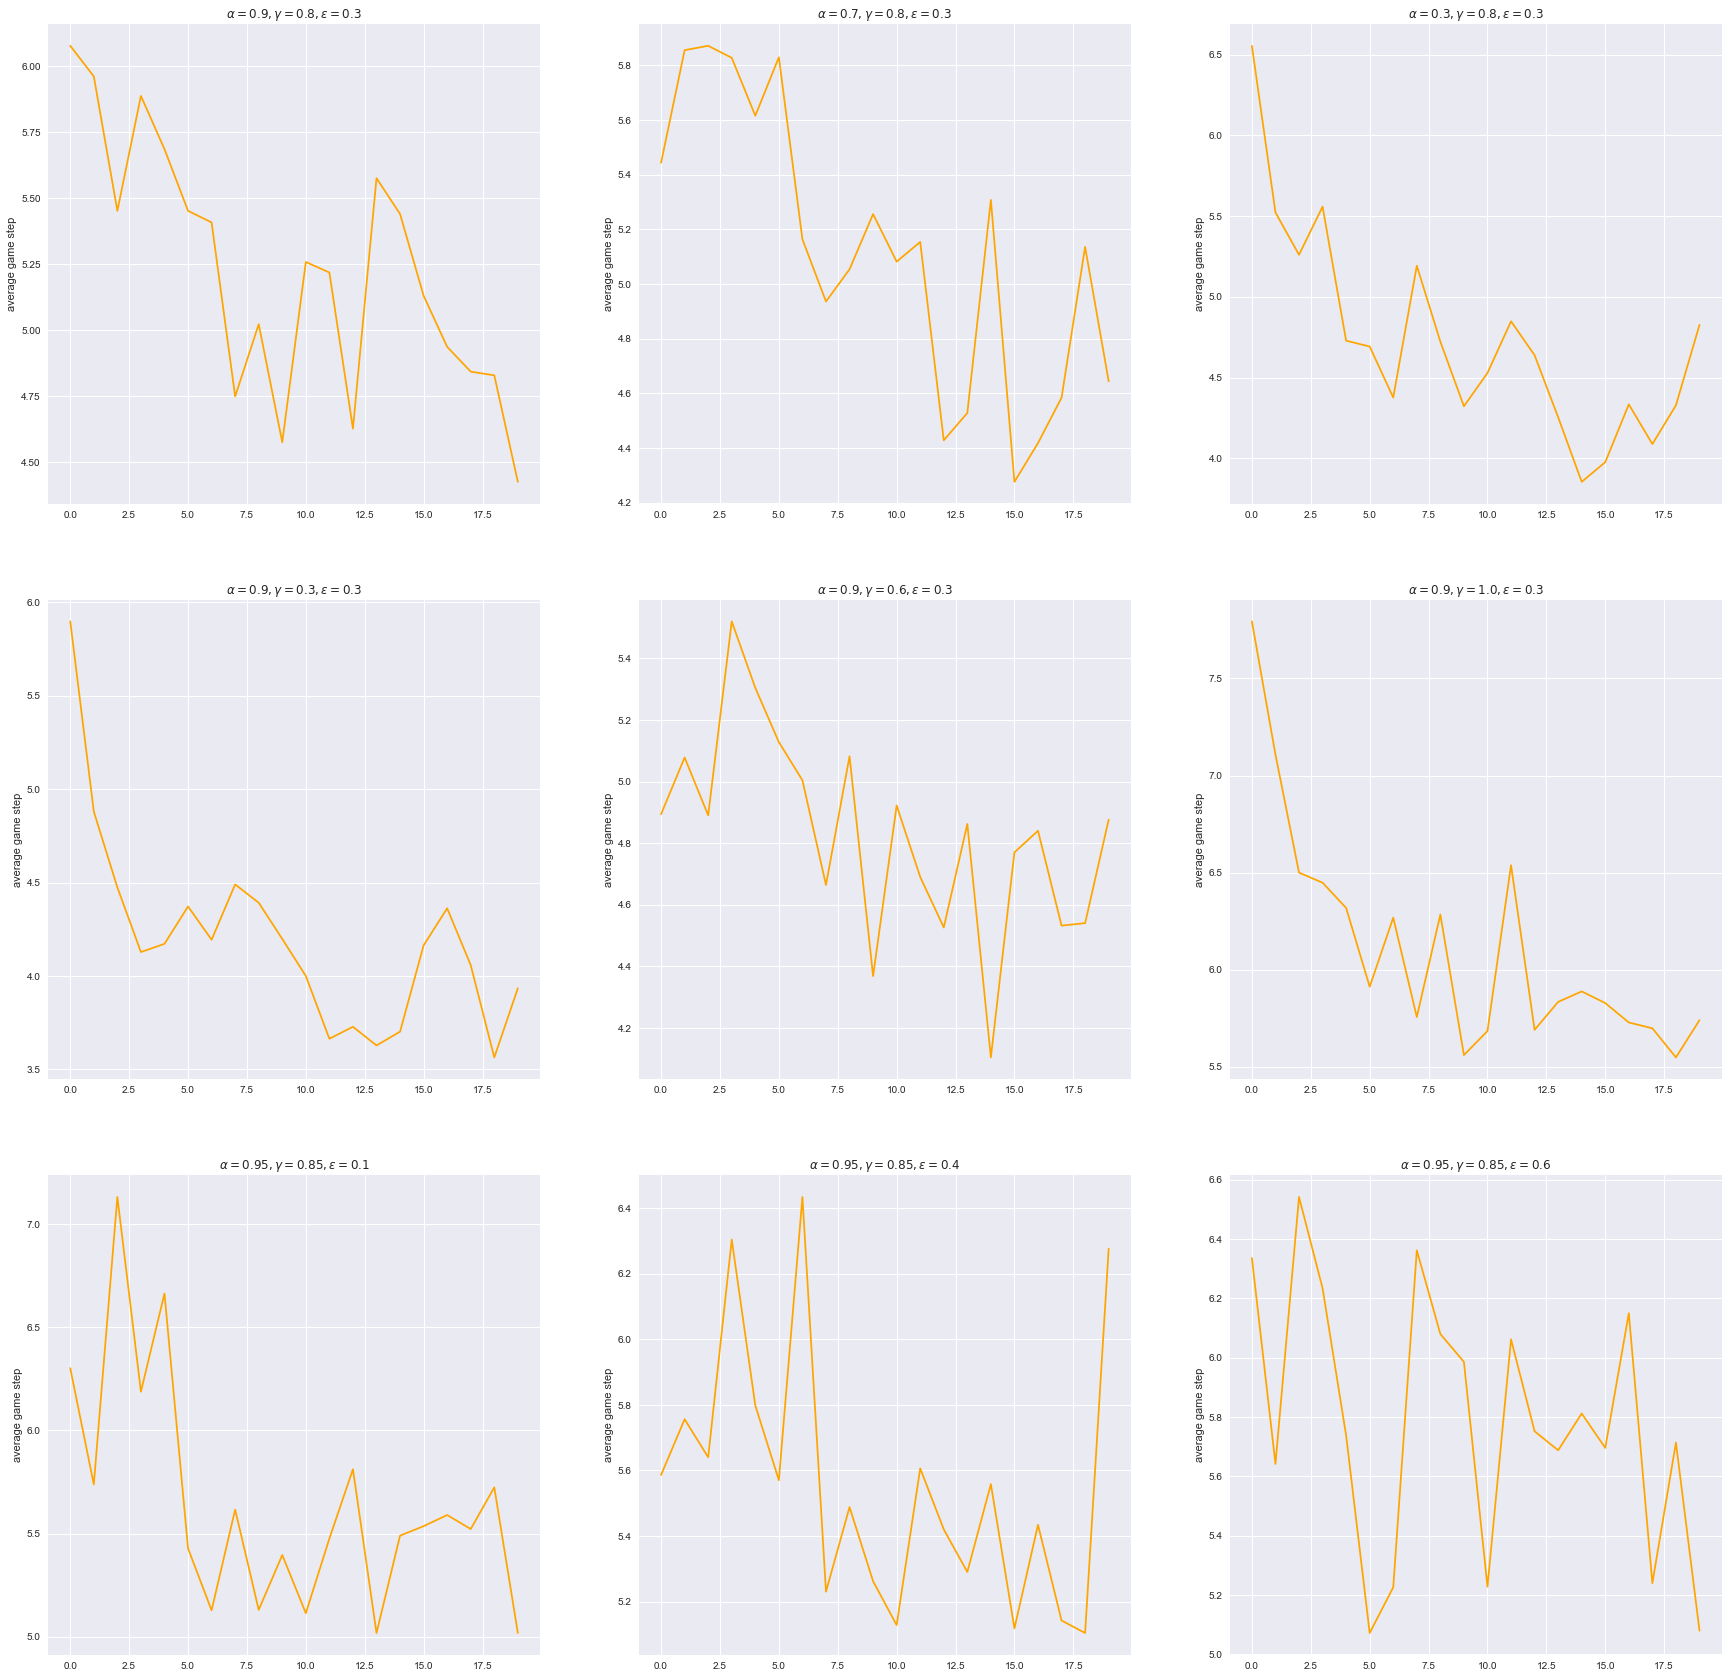

In [36]:
plt.figure(figsize = (30,30))
for i in range(9):
    plt.subplot(3,3,i + 1)
    history = history_list[i]
    param   = parameters[i]
    ratio   = compute_ratio(history['game_step'],500)
    title   = fr"$\alpha = {param[0]},\gamma = {param[1]},\epsilon = {param[2]}$"
    plt.title(title)
    plt.plot(ratio,color = "orange")
    plt.ylabel("average game step")
plt.savefig("sarsa_step.jpg")

#### Time Curve

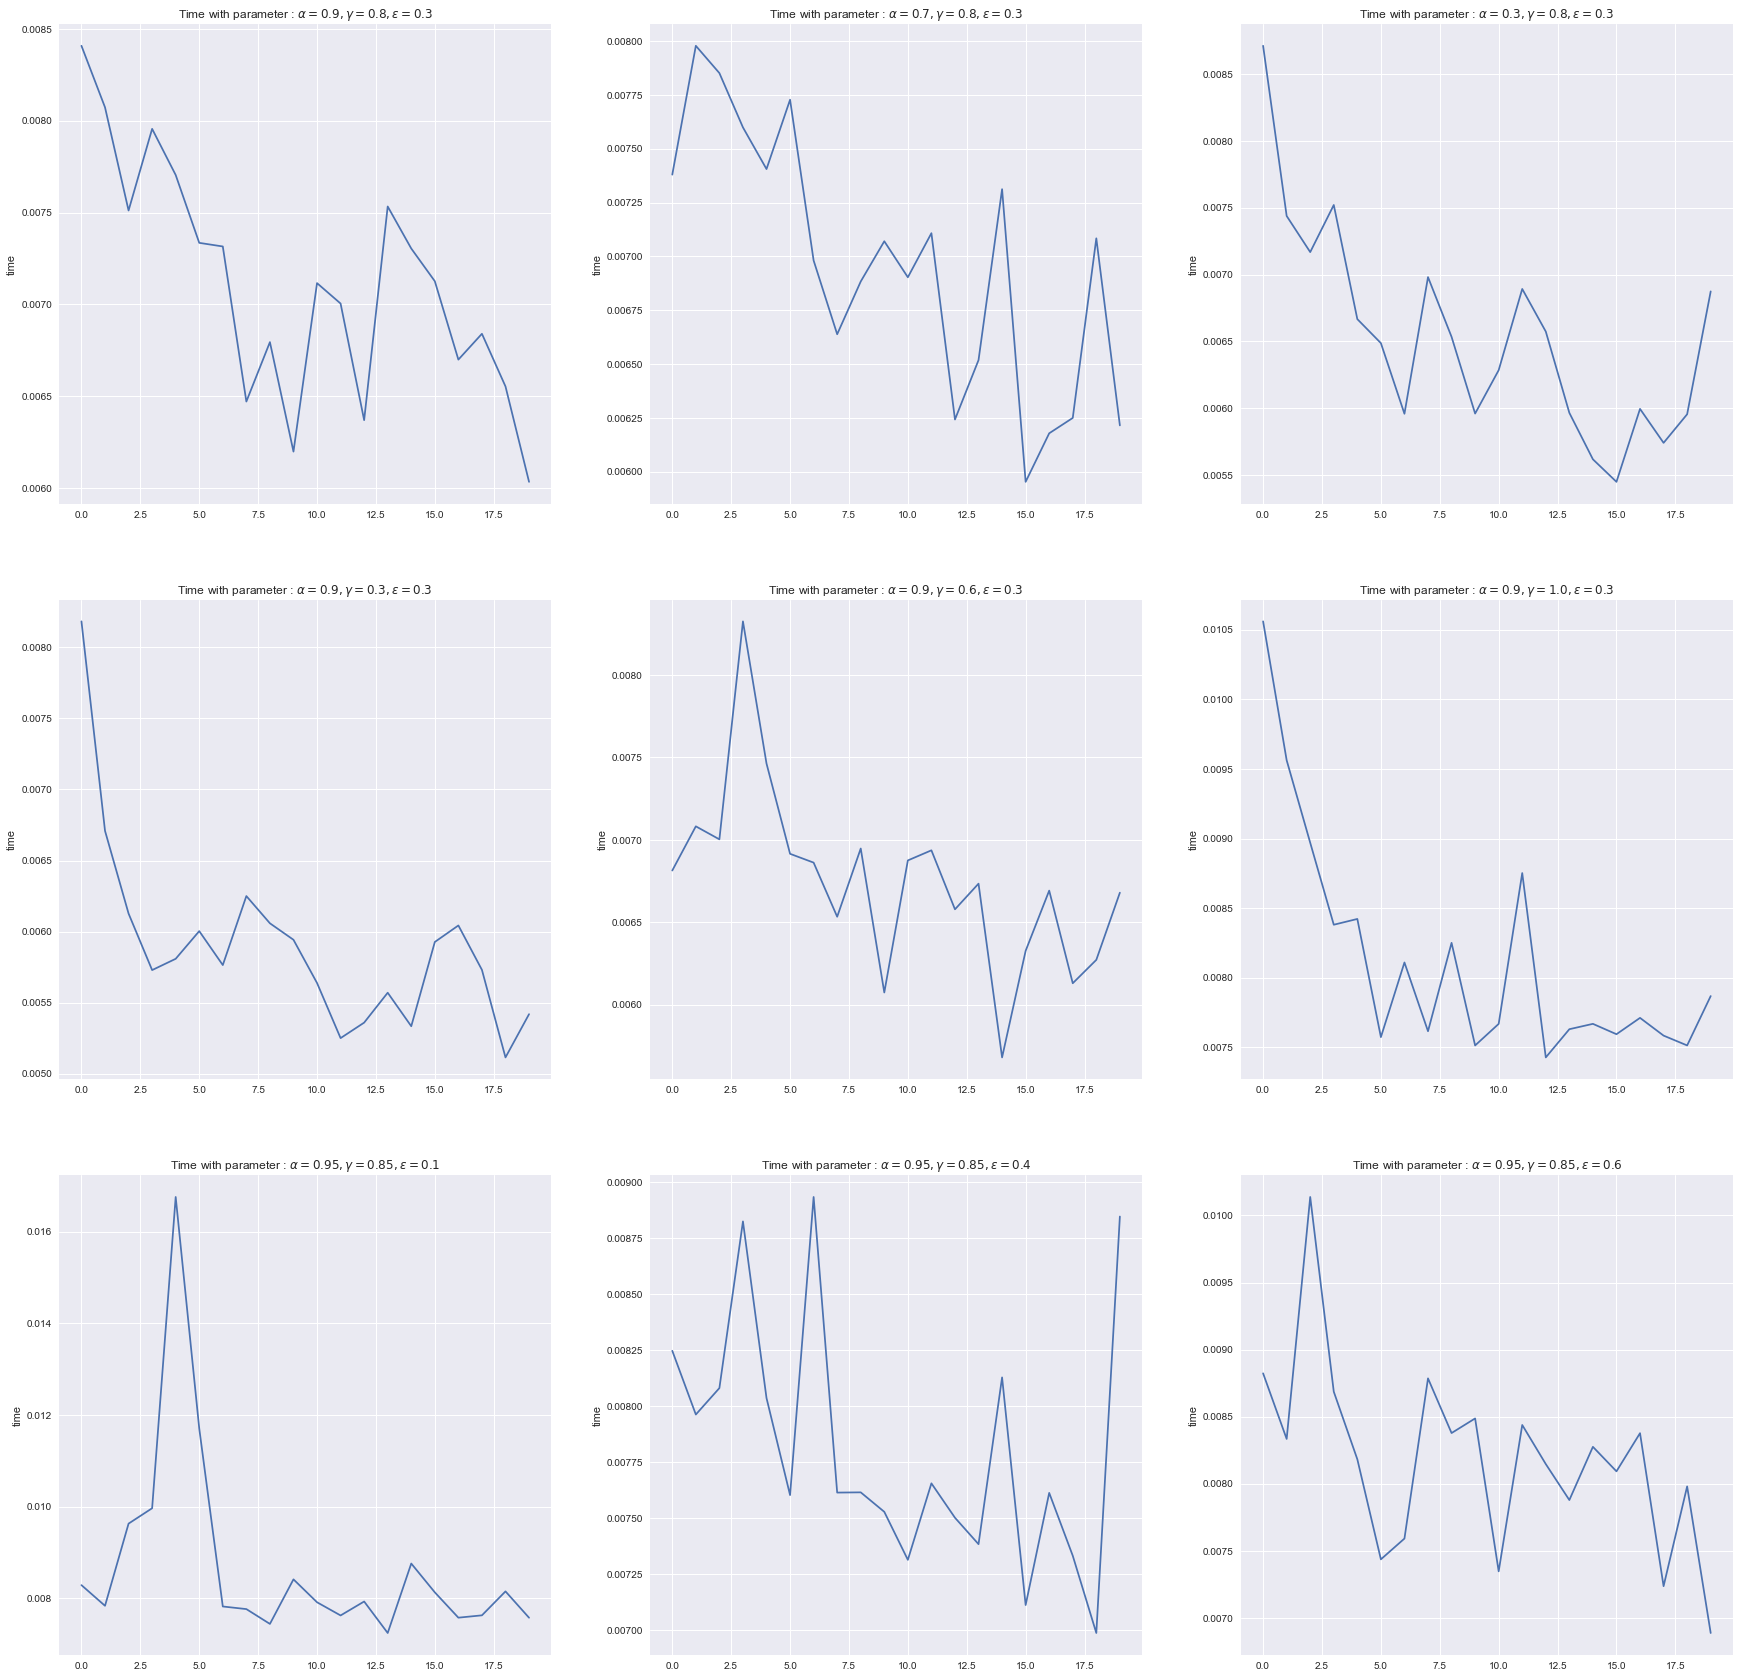

In [37]:
plt.figure(figsize = (30,30))
for i in range(9):
    plt.subplot(3,3,i + 1)
    history = history_list[i]
    param   = parameters[i]
    ratio   = compute_ratio(history['time'],500)
    title   = fr"Time with parameter : $\alpha = {param[0]},\gamma = {param[1]},\epsilon = {param[2]}$"
    plt.title(title)
    plt.plot(ratio)
    plt.ylabel("time")
plt.savefig("sarsa_time.jpg")

In [38]:
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
def plotQtable(qtable,title,encode):
    encode_key = []
    value = []
    for k,v in qtable.items():
        value.append(v)
        encode_key.append("".join(list(map(str,k[0]))) + str(k[1]))

    encode.fit(encode_key) ### embedding (state,action) space to 0....N
    encode_key = encode.transform(encode_key)
    value = np.array(value)
    
    return encode_key,value

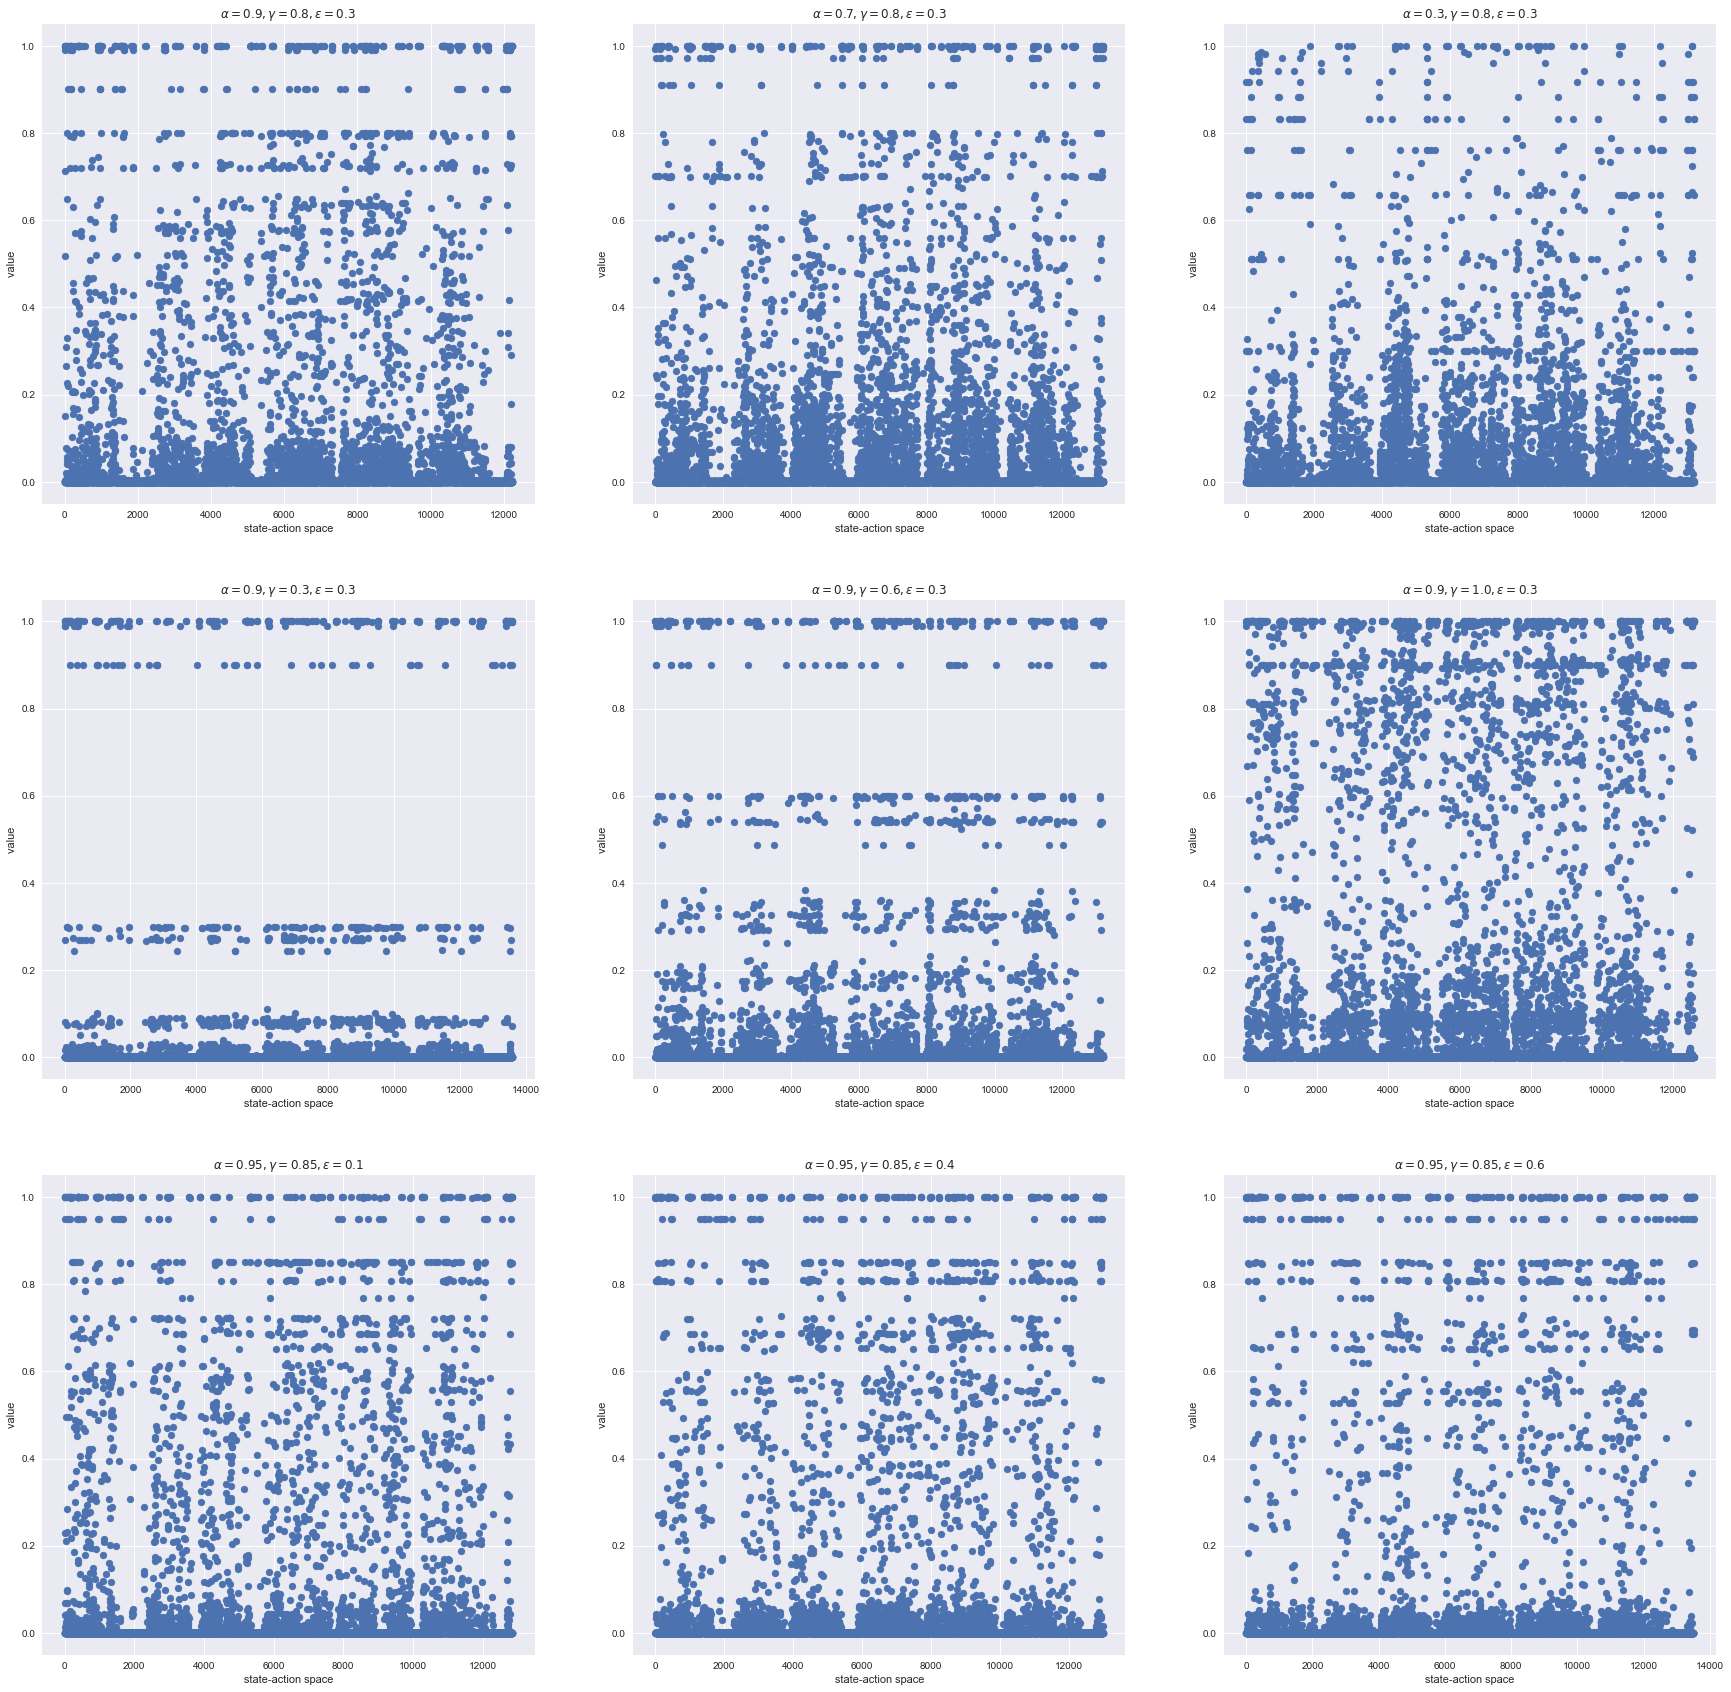

In [39]:
encode = LabelEncoder()
plt.figure(figsize = (30,30))
for i in range(len(parameters)):
    param = parameters[i]
    title   = fr"$\alpha = {param[0]},\gamma = {param[1]},\epsilon = {param[2]}$"
    table = history_list[i]["Qtable"]
    encodekey,value = plotQtable(table,title,encode)
    
    plt.subplot(3,3,i + 1)
    plt.title(title)
    plt.scatter(encodekey,value)
    plt.xlabel(" state-action space ")
    plt.ylabel(" value ")
plt.savefig("sarsa_state.jpg")

### Q-learning

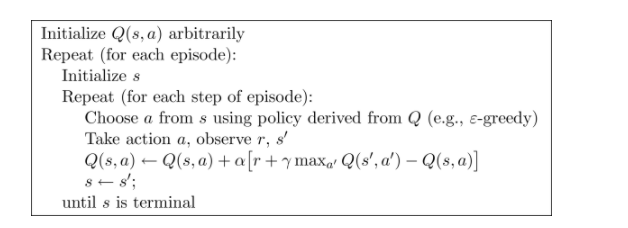

In [52]:
import copy
def choose_max_qvale(Qtable,state):
    state_temp = copy.copy(state)
    state_temp = tuple(state_temp.flatten().tolist())
    max_value  = -1
    for key in Qtable.keys():
       # print(key[0],state_temp)
        if key[0] == state_temp and Qtable[key] > max_value:
            max_value = Qtable[key]
    
    return max_value

def QLearning(alpha,gamma,epsilon,iters = 100000,seed = 10):
    print("                       #### START Q-LEARNING  ALGORITHM ####                      ")
    algorithm_paramters = f"""
    Algorithm parameters contain 
    alpha : {alpha}
    gamma : {gamma}
    epsilon : {epsilon}
    
    """
    print(algorithm_paramters)
    Q   = {} ## Qtable
    bar = qqdm(range(iters))
    win_array = np.zeros(iters)
    sum_reward= 0.0
    win_num   = 0.0
    rng       = np.random.RandomState(seed)
    time_list = []
    step_list = []
    for n in bar:
        step = 0
        #epsilon_f = epsilon_0 / (1 + beta * n)   ## DECAYING EPSILON
        Done=0                                    ## SET DONE TO ZERO (BEGINNING OF THE EPISODE)
        i = 1                                     ## COUNTER FOR NUMBER OF ACTIONS
        S,X,allowed_a=env.Initialise_game()
        a,_          = np.where(allowed_a==1)
        for item in a:
            k = convert_key(S,item)
            Q[k] = rng.rand(1)[0]/1000

        action = epsilon_greedy(Q,epsilon,S,a)
        tmp_reward = 0.0
        
        start     = time.time()
        while Done==0:          
            ## THIS IS A RANDOM AGENT, CHANGE IT...
            S_next,X_next,allowed_a_next,R,Done = env.OneStep(action)
            
            if Done:
                a = []
            else:
                a,_           = np.where(allowed_a_next==1)

            for item in a:
                k = convert_key(S_next,item)
                if k not in Q.keys():
                    Q[k] = rng.rand(1)[0]/1000
            step +=1
            if not(Done):
                nextaction           = epsilon_greedy(Q,epsilon,S_next,a)
            else:
                nextaction           = None
            current_key = convert_key(S,action)
            if current_key not in Q.keys():
                Q[current_key] = rng.rand(1)[0]/1000
            ### update Q table 
            if not(Done):
                next_key = convert_key(S_next,nextaction)
               # print(choose_max_qvale(Q,S_next))
                Q[current_key] += alpha * (R + gamma * choose_max_qvale(Q,S_next) - Q[current_key]) ## Q-value update parameter
            else:
                Q[current_key] += alpha * (R - Q[current_key])

            if Done:
                if R == 1: ### win 
                    win_num += 1
                    tmp_reward+= R
                    win_array[n]= 1 
                break
            else:
                ## ONLY TO PUT SUMETHING
                PIPPO=1
            ## THE EPISODE HAS ENDED, UPDATE...BE CAREFUL, THIS IS THE LAST STEP OF THE EPISODE
            action = nextaction
            S=np.copy(S_next)
            X=np.copy(X_next)
            #allowed_a=np.copy(allowed_a_next)

            i += 1  # UPDATE COUNTER FOR NUMBER OF ACTIONS
        end    = time.time()
        step_list.append(step)
        time_list.append(end - start)
        sum_reward += tmp_reward
        bar.set_infos(
            {
                    "round-reward":tmp_reward,
                    "reward":sum_reward,
                    "iters":n + 1,
                    "win_ratio":win_num/(n + 1)
            }
        )
            # NEXT STATE AND CO. BECOME ACTUAL STATE...  
    history = {
        "win_array":win_array,
        "Qtable"   :Q,
        "sum_reward" : sum_reward,
        "win_num" : win_num,
        "time" : time_list,
        "game_step":step_list
    }
    
    print("                        #### END Q-LEARNING  ALGORITHM ####                         ")
    return history

In [53]:
seed         = 20220319
history_list_qlearning = [] 
for param in parameters:
    history_list_qlearning.append(
       QLearning(
            alpha = param[0],
            gamma = param[1],
            epsilon=param[2],
            iters= 10000,
            seed = seed
        )
    )

                       #### START Q-LEARNING  ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.9
    gamma : 0.8
    epsilon : 0.3
    
    


    Iters       Elapsed Time       Speed    round-reward  reward  iters  win_ratio                                      
 10000/10000  00:01:49<00:00:00  90.96it/s      1.0       5903.0  10000   0.5903                                        

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END Q-LEARNING  ALGORITHM ####                         
                       #### START Q-LEARNING  ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.7
    gamma : 0.8
    epsilon : 0.3
    
    


    Iters       Elapsed Time       Speed    round-reward  reward  iters  win_ratio                                      
 10000/10000  00:01:54<00:00:00  87.60it/s      0.0       5885.0  10000   0.5885                                        

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END Q-LEARNING  ALGORITHM ####                         
                       #### START Q-LEARNING  ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.3
    gamma : 0.8
    epsilon : 0.3
    
    


    Iters       Elapsed Time       Speed    round-reward  reward  iters  win_ratio                                      
 10000/10000  00:02:01<00:00:00  82.55it/s      0.0       5893.0  10000   0.5893                                        

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END Q-LEARNING  ALGORITHM ####                         
                       #### START Q-LEARNING  ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.9
    gamma : 0.3
    epsilon : 0.3
    
    


    Iters       Elapsed Time       Speed    round-reward  reward  iters  win_ratio                                      
 10000/10000  00:01:48<00:00:00  92.38it/s      1.0       5942.0  10000   0.5942                                        

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END Q-LEARNING  ALGORITHM ####                         
                       #### START Q-LEARNING  ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.9
    gamma : 0.6
    epsilon : 0.3
    
    


    Iters       Elapsed Time       Speed    round-reward  reward  iters  win_ratio                                      
 10000/10000  00:01:43<00:00:00  96.72it/s      1.0       5922.0  10000   0.5922                                        

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END Q-LEARNING  ALGORITHM ####                         
                       #### START Q-LEARNING  ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.9
    gamma : 1.0
    epsilon : 0.3
    
    


    Iters       Elapsed Time       Speed    round-reward  reward  iters  win_ratio                                      
 10000/10000  00:02:43<00:00:00  61.03it/s      1.0       5282.0  10000   0.5282                                        

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END Q-LEARNING  ALGORITHM ####                         
                       #### START Q-LEARNING  ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.95
    gamma : 0.85
    epsilon : 0.1
    
    


    Iters       Elapsed Time       Speed    round-reward  reward  iters  win_ratio                                      
 10000/10000  00:01:50<00:00:00  90.86it/s      1.0       6603.0  10000   0.6603                                        

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END Q-LEARNING  ALGORITHM ####                         
                       #### START Q-LEARNING  ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.95
    gamma : 0.85
    epsilon : 0.4
    
    


    Iters       Elapsed Time       Speed    round-reward  reward  iters  win_ratio                                      
 10000/10000  00:01:44<00:00:00  95.60it/s      1.0       5547.0  10000   0.5547                                        

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END Q-LEARNING  ALGORITHM ####                         
                       #### START Q-LEARNING  ALGORITHM ####                      

    Algorithm parameters contain 
    alpha : 0.95
    gamma : 0.85
    epsilon : 0.6
    
    


    Iters       Elapsed Time       Speed    round-reward  reward  iters  win_ratio                                      
 10000/10000  00:01:57<00:00:00  84.95it/s      1.0       4433.0  10000   0.4433                                        

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

                        #### END Q-LEARNING  ALGORITHM ####                         


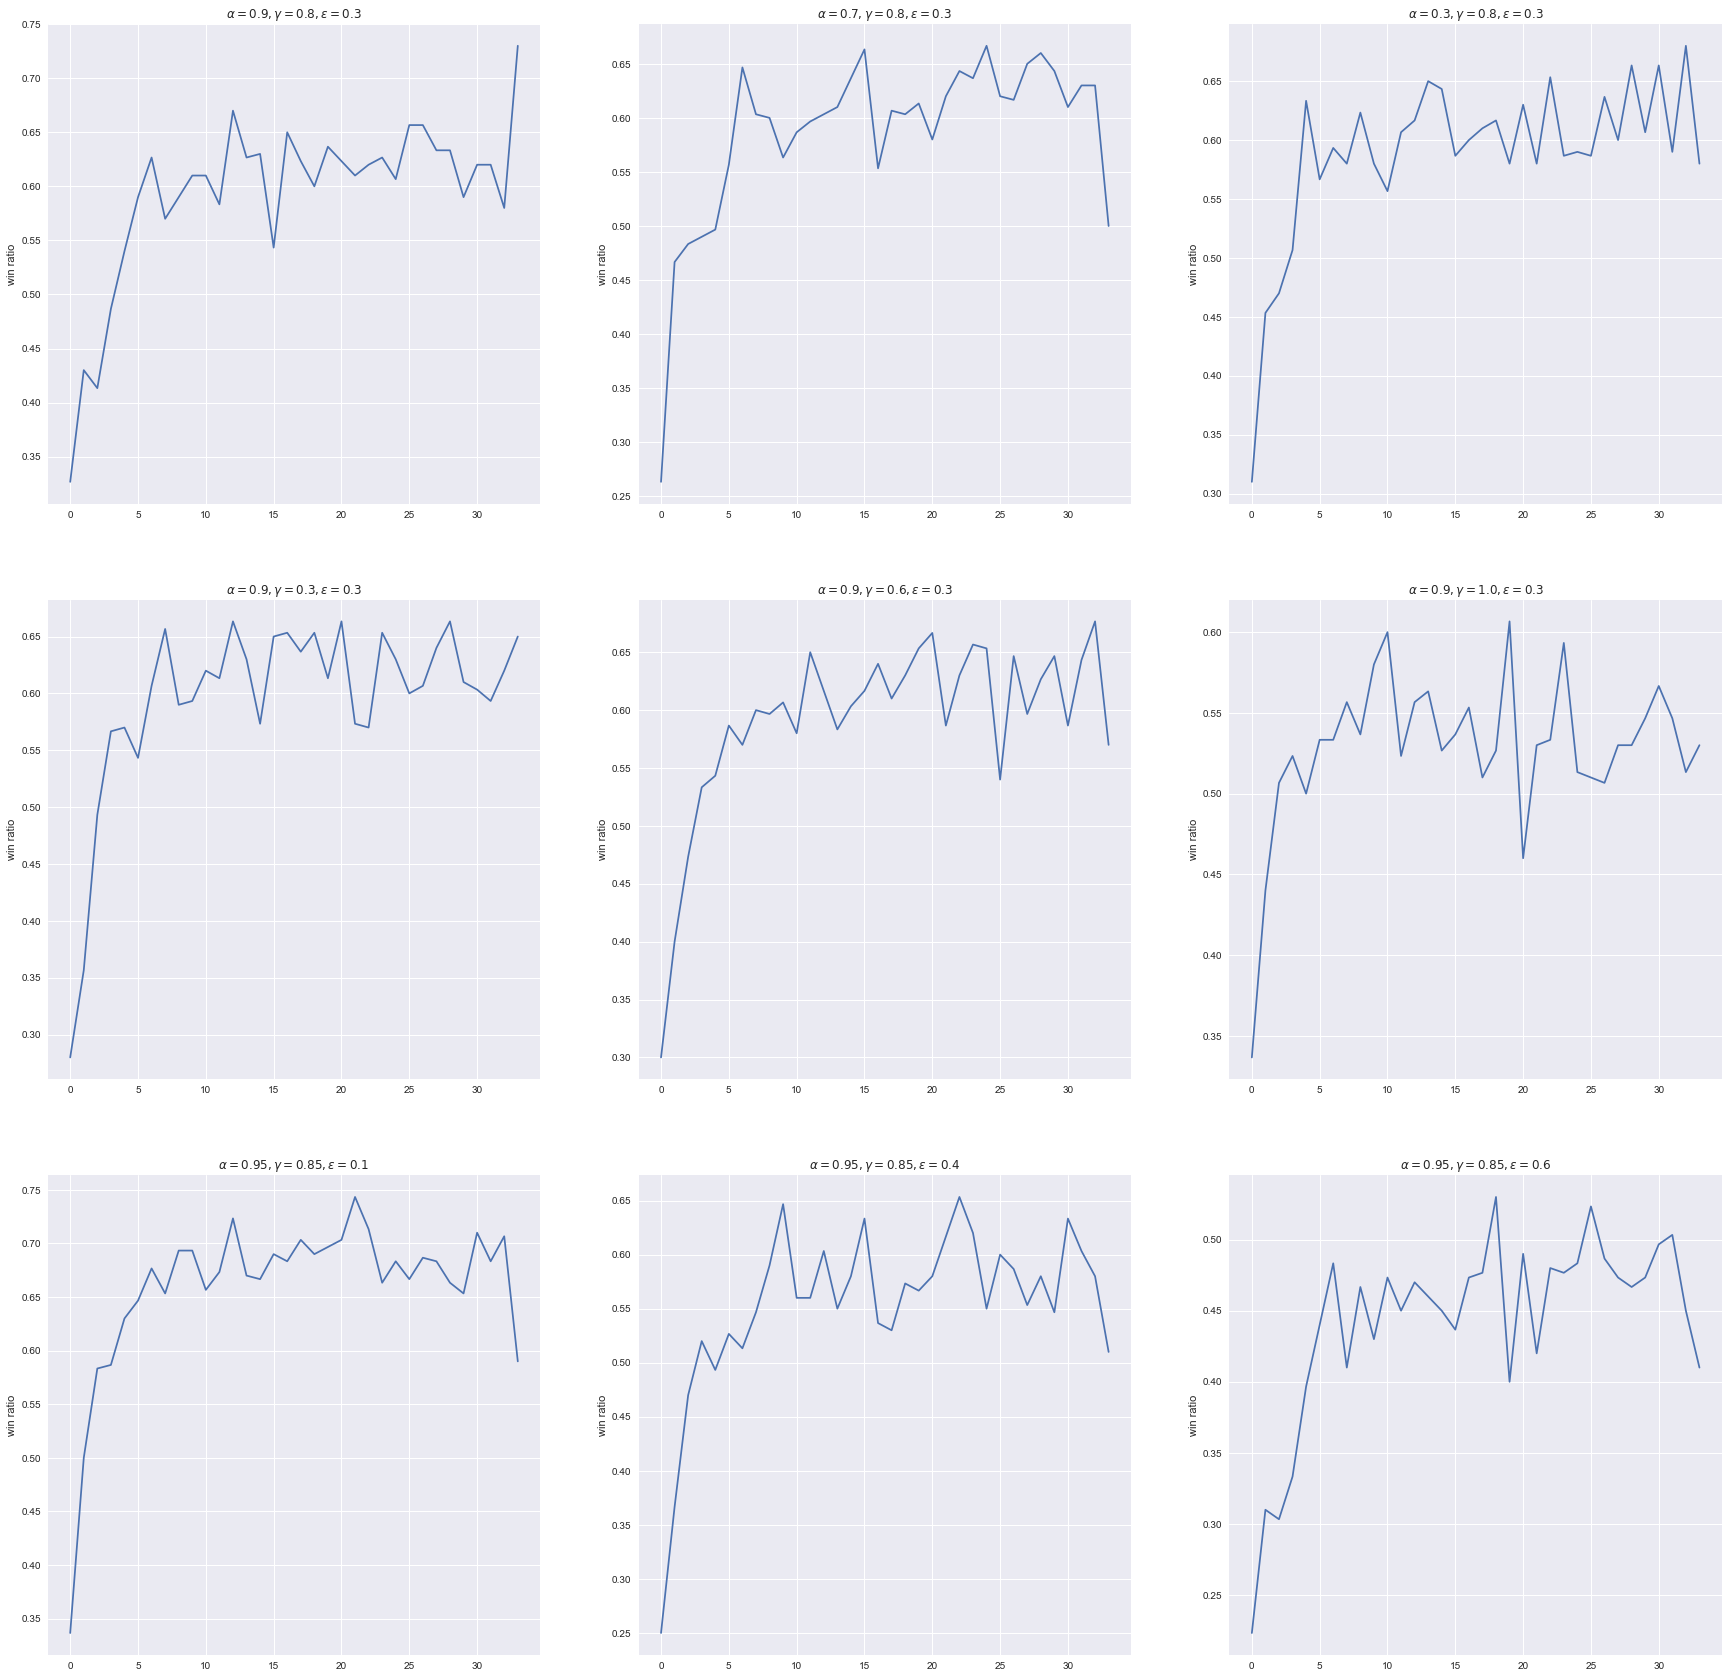

In [54]:
plt.figure(figsize = (30,30))
for i in range(9):
    plt.subplot(3,3,i + 1)
    history = history_list_qlearning[i]
    param   = parameters[i]
    ratio   = compute_ratio(history['win_array'],300)
    title   = fr"$\alpha = {param[0]},\gamma = {param[1]},\epsilon = {param[2]}$"
    plt.title(title)
    plt.plot(ratio)
    plt.ylabel("win ratio")
plt.savefig("qlearning.jpg")

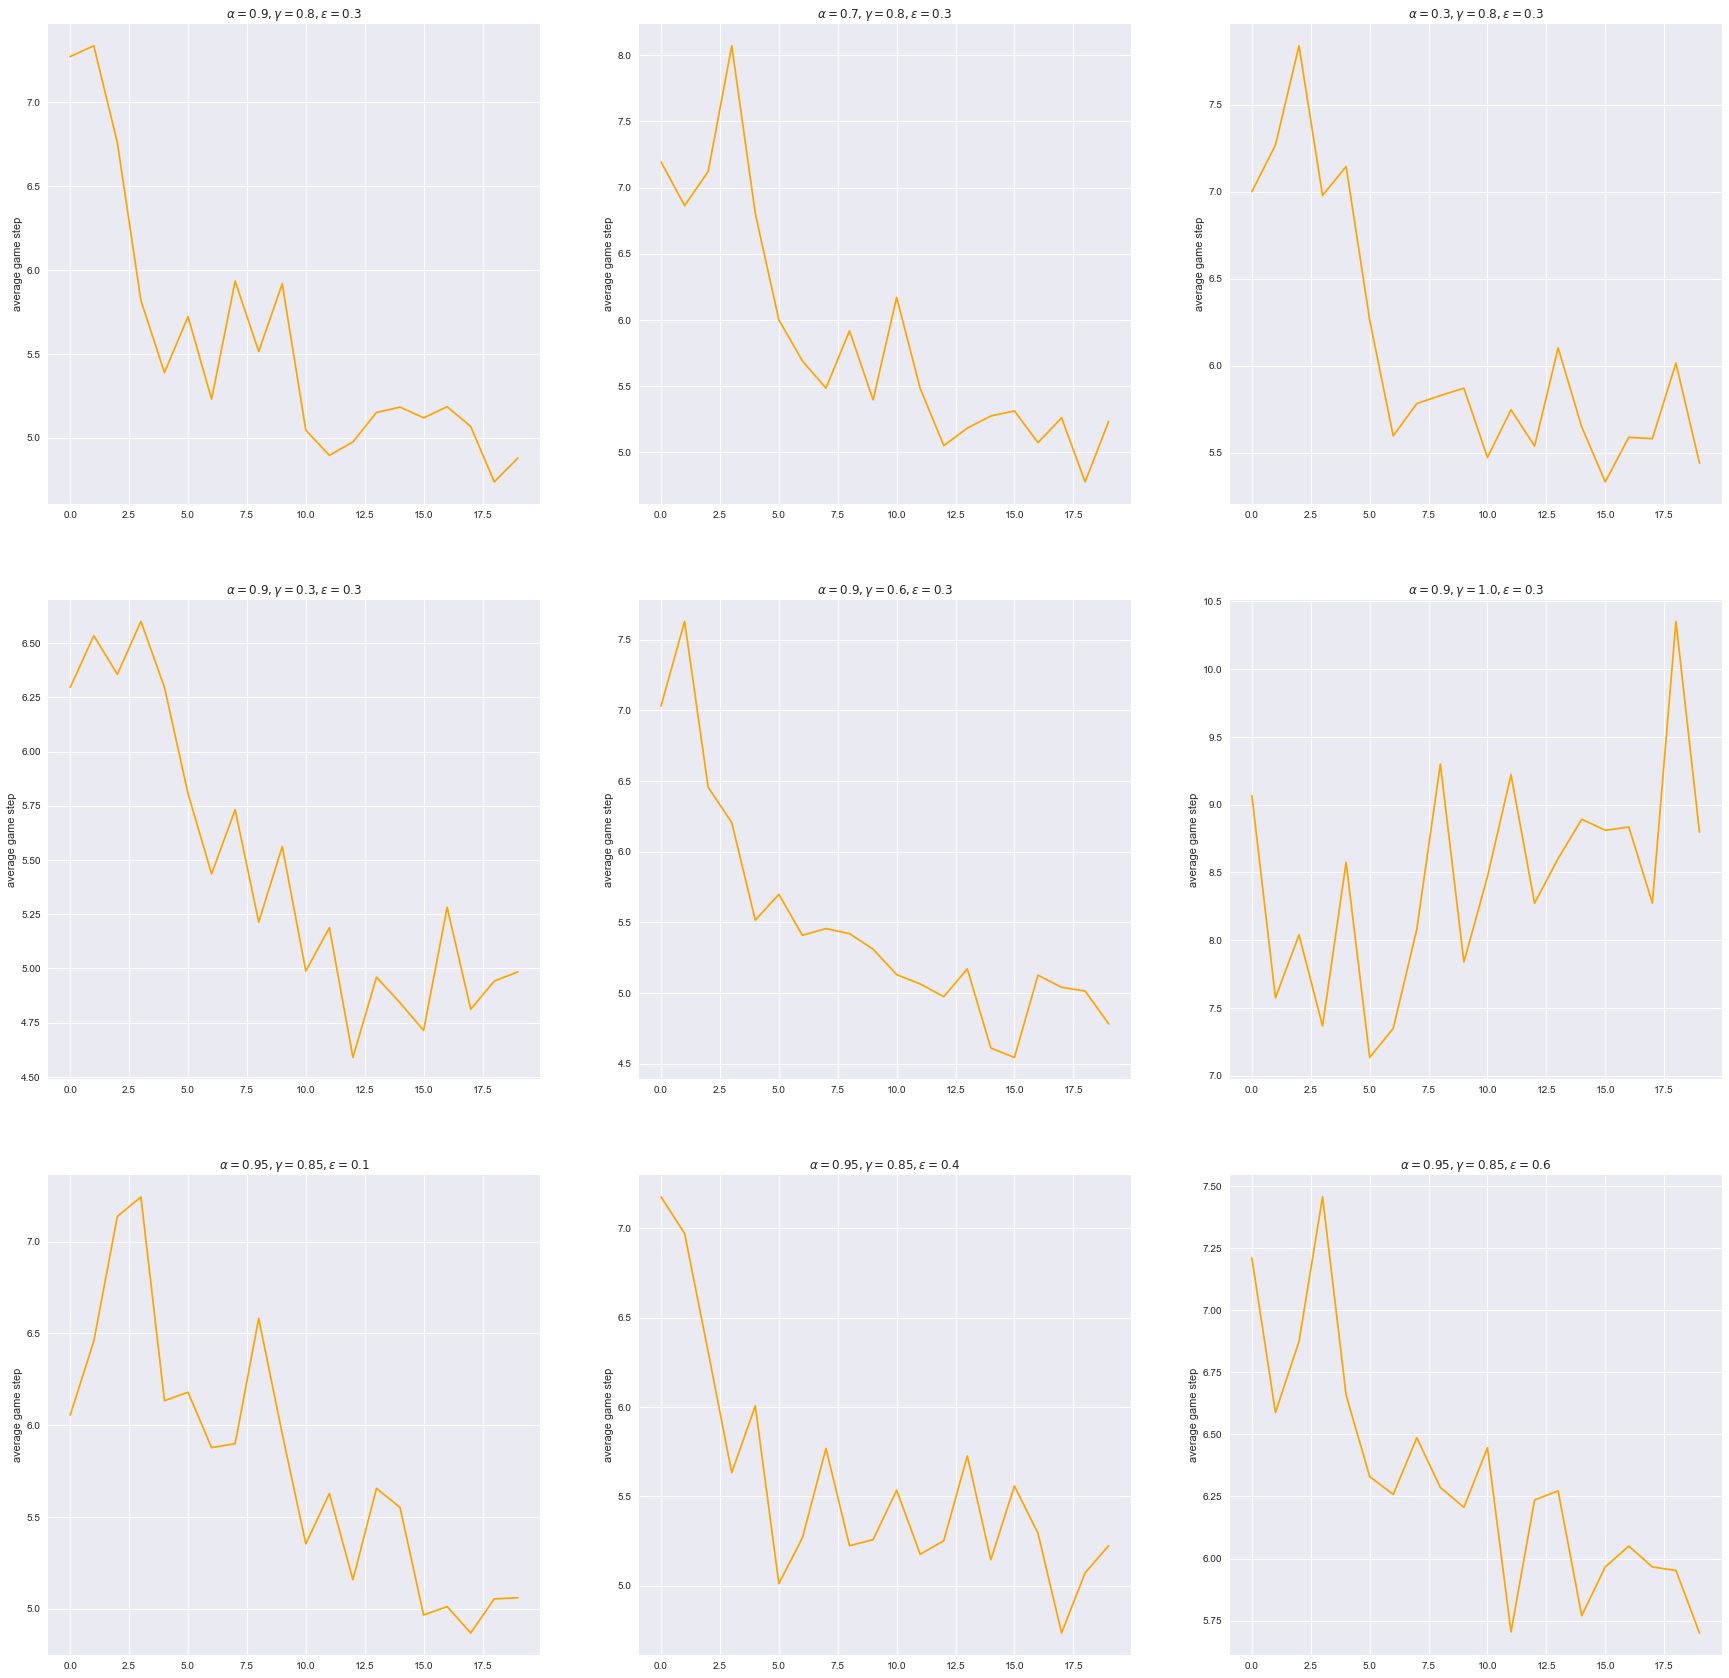

In [55]:
plt.figure(figsize = (30,30))
for i in range(9):
    plt.subplot(3,3,i + 1)
    history = history_list_qlearning[i]
    param   = parameters[i]
    ratio   = compute_ratio(history['game_step'],500)
    title   = fr"$\alpha = {param[0]},\gamma = {param[1]},\epsilon = {param[2]}$"
    plt.title(title)
    plt.plot(ratio,color = "orange")
    plt.ylabel("average game step")
plt.savefig("qlearning_step.jpg")

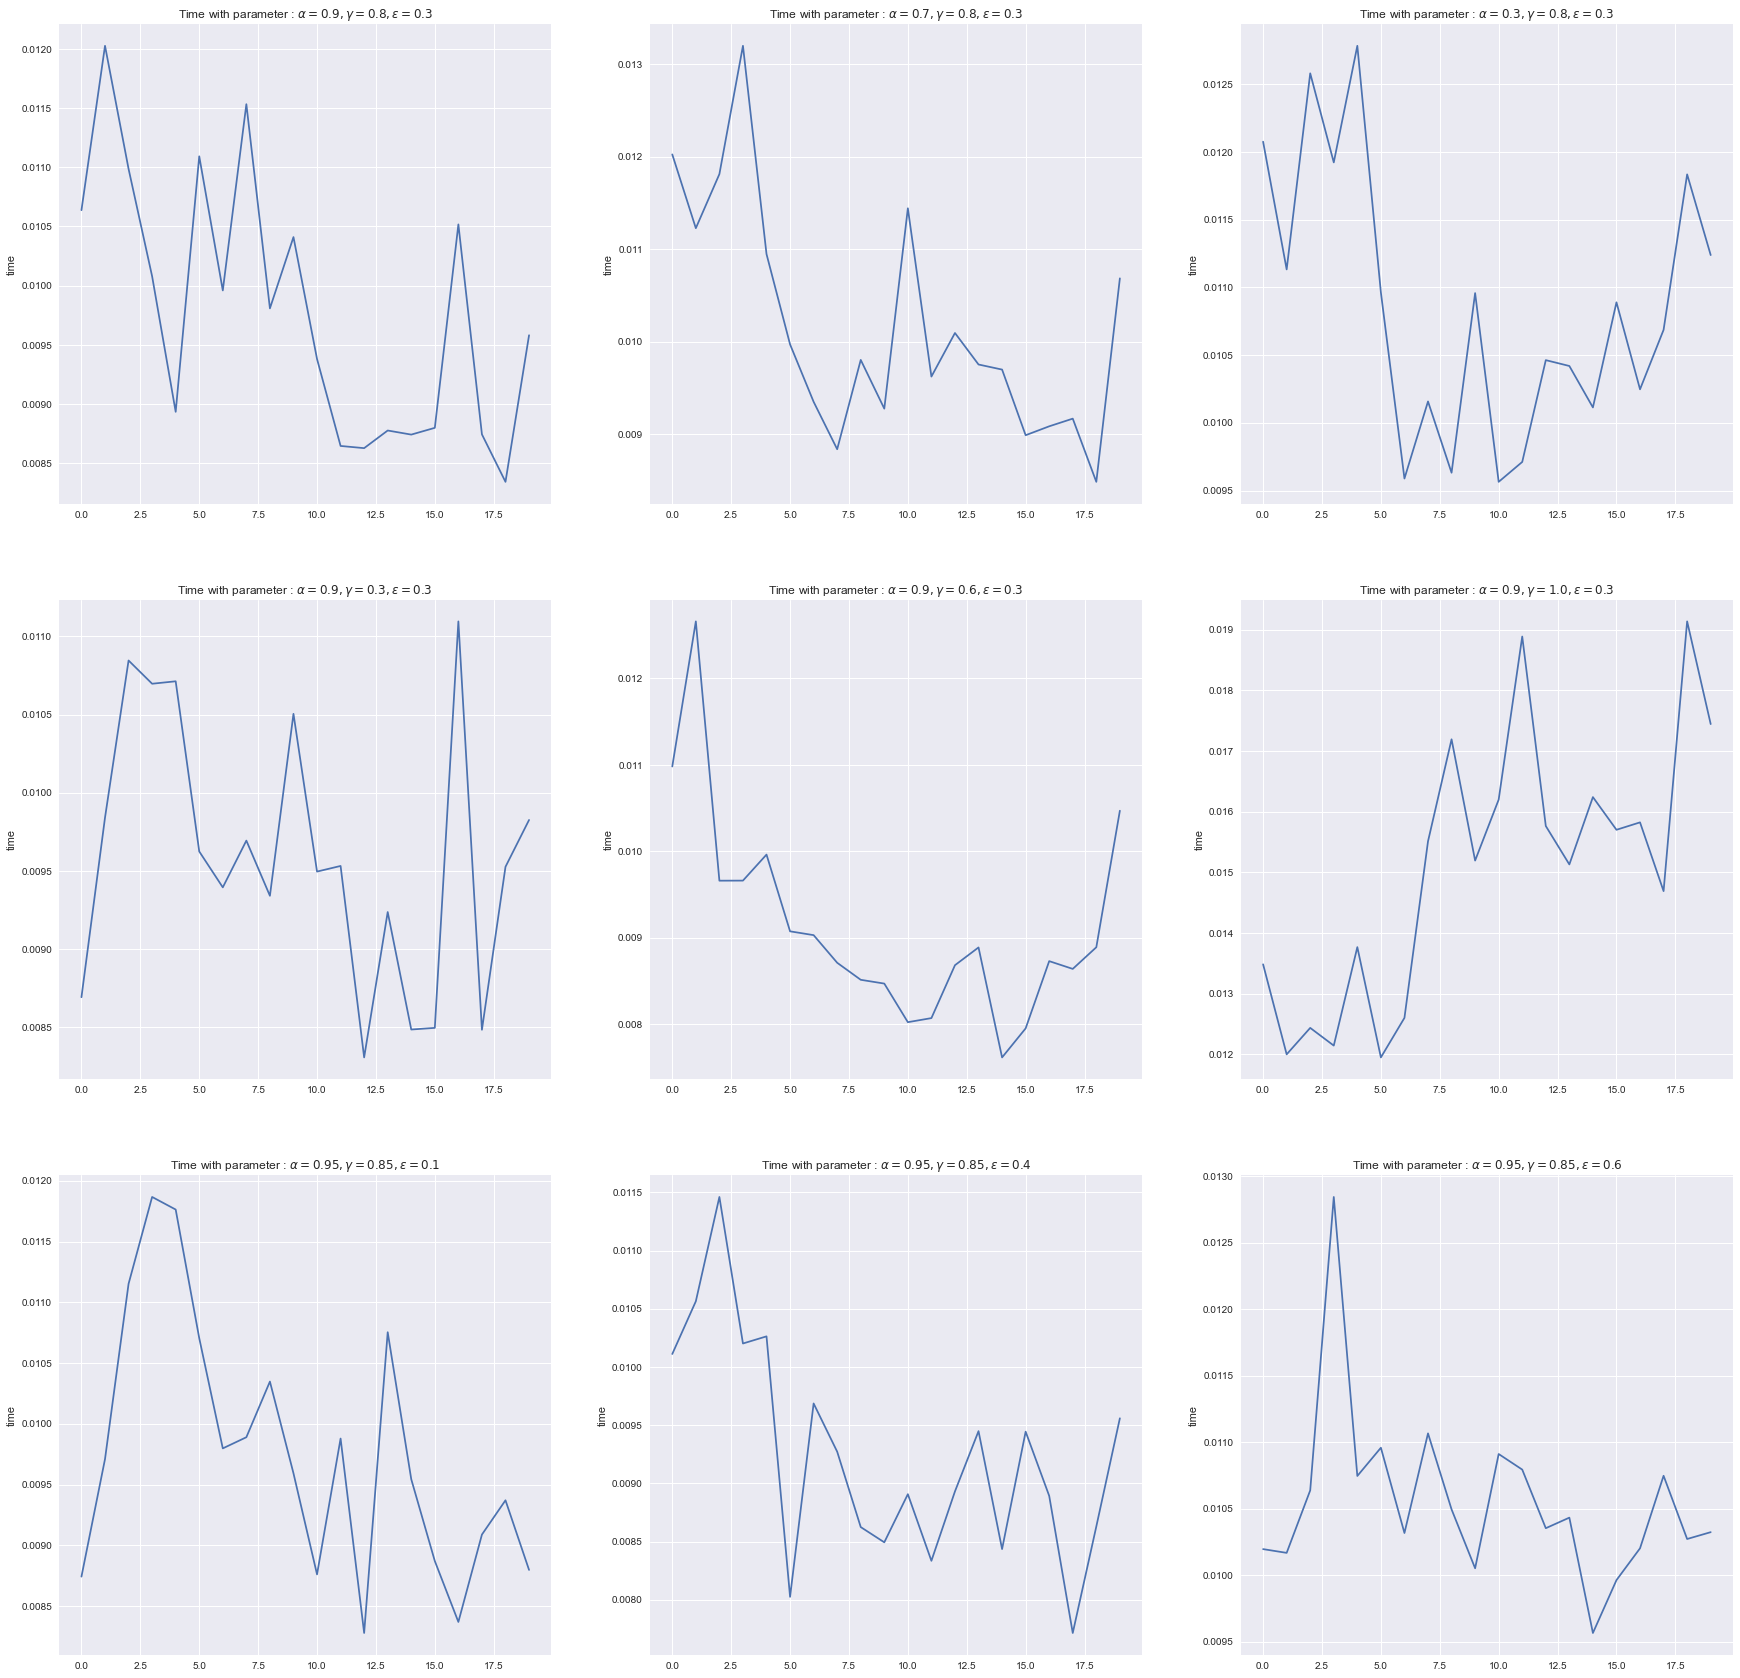

In [56]:
plt.figure(figsize = (30,30))
for i in range(9):
    plt.subplot(3,3,i + 1)
    history = history_list_qlearning[i]
    param   = parameters[i]
    ratio   = compute_ratio(history['time'],500)
    title   = fr"Time with parameter : $\alpha = {param[0]},\gamma = {param[1]},\epsilon = {param[2]}$"
    plt.title(title)
    plt.plot(ratio)
    plt.ylabel("time")
plt.savefig("qlearning_time.jpg")

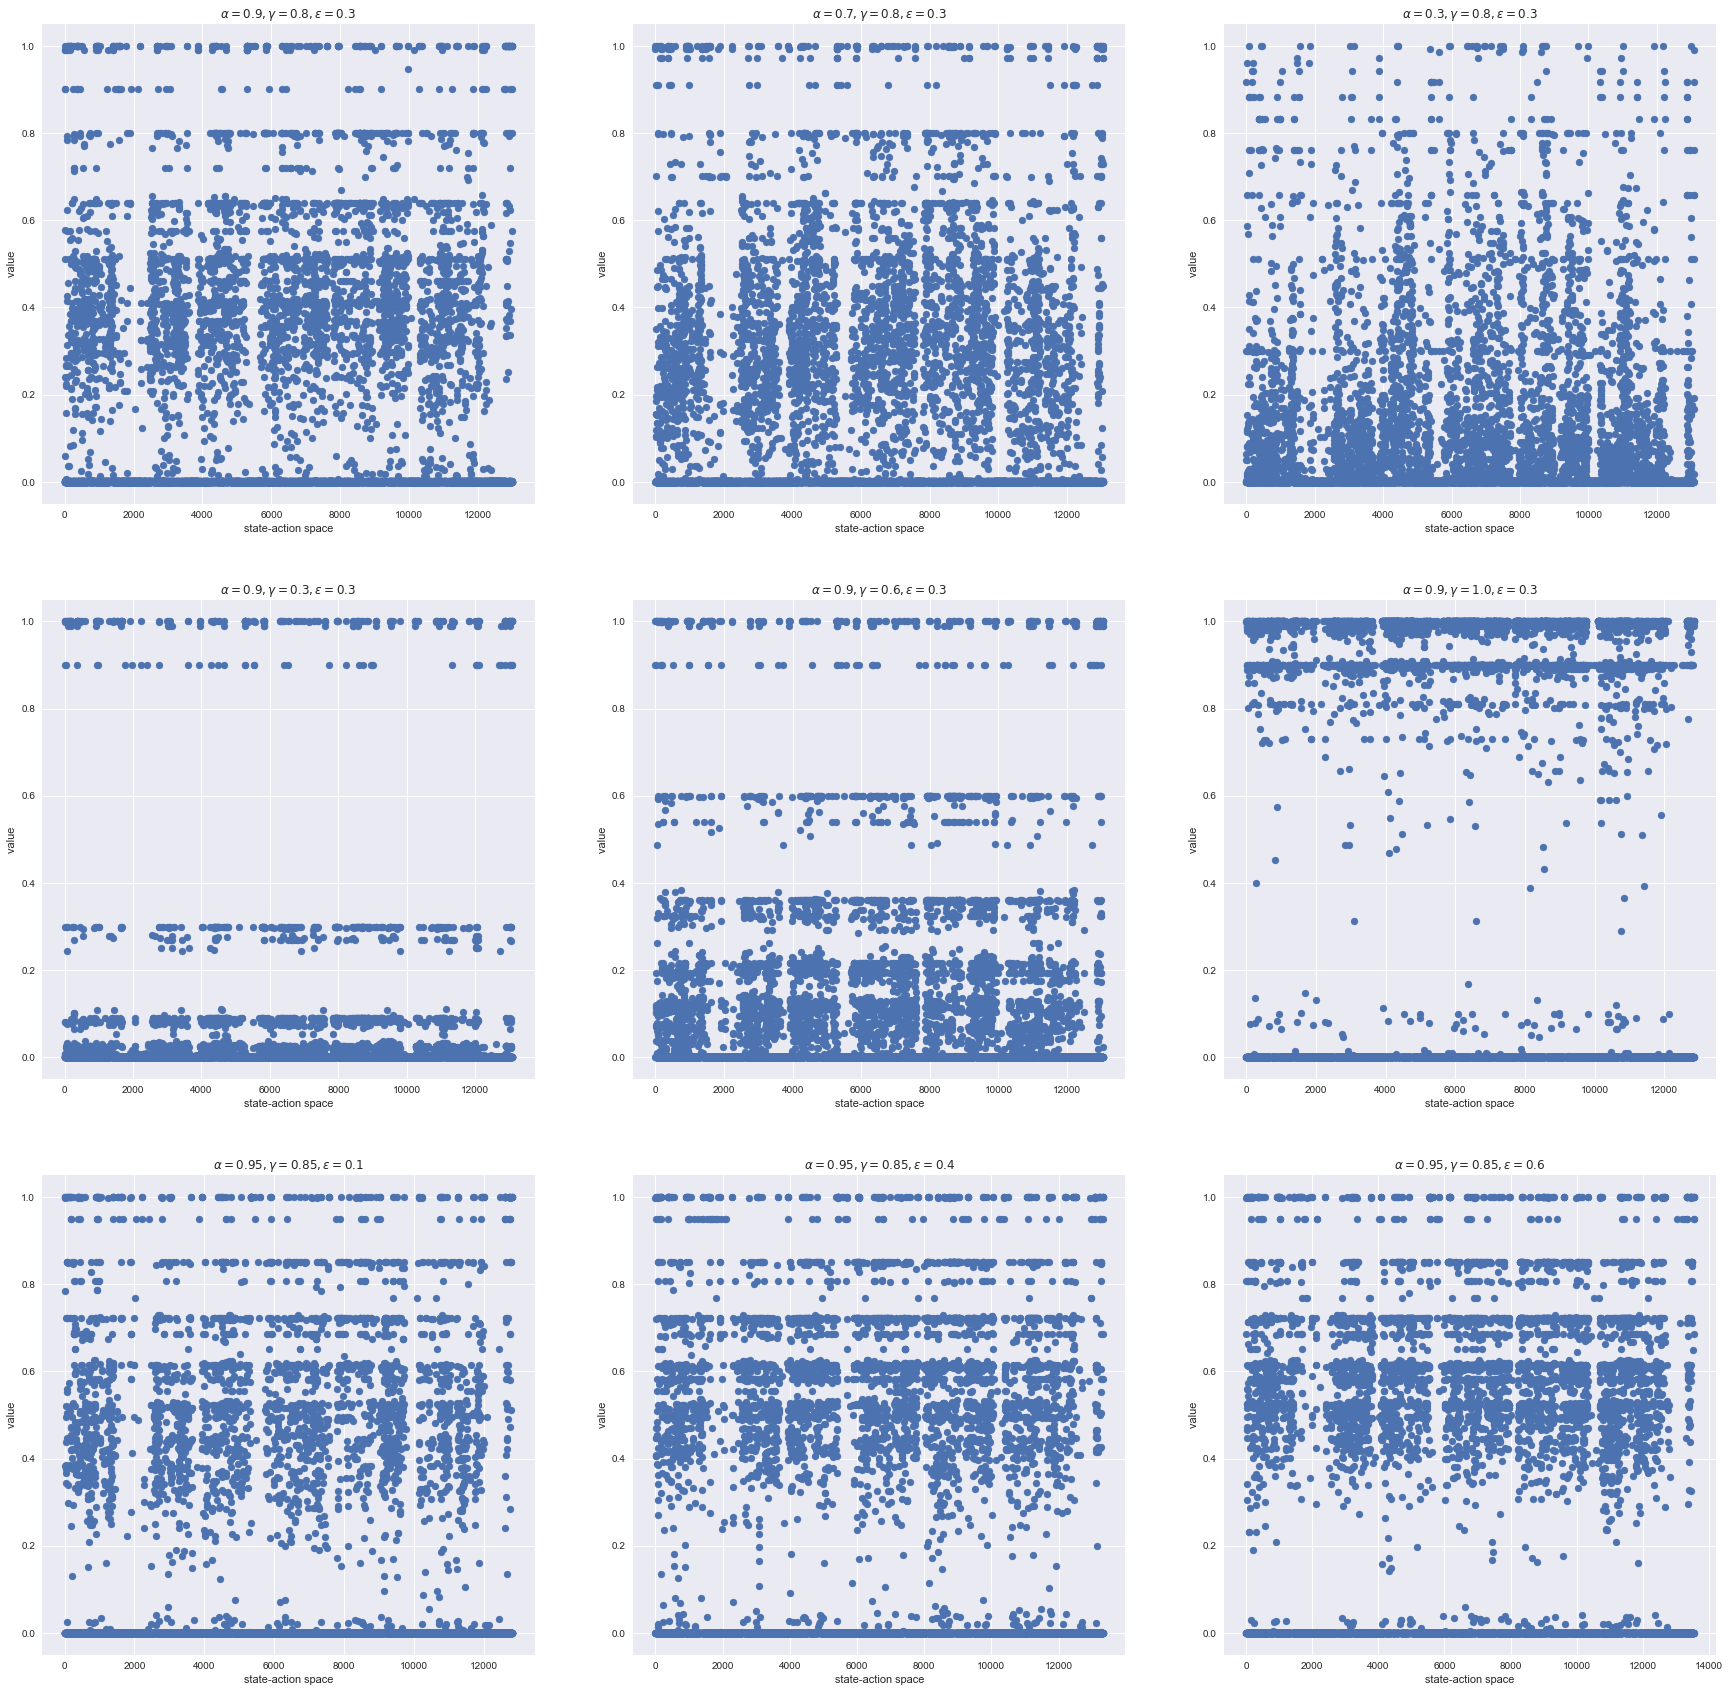

In [57]:
encode = LabelEncoder()
plt.figure(figsize = (30,30))
for i in range(len(parameters)):
    param = parameters[i]
    title   = fr"$\alpha = {param[0]},\gamma = {param[1]},\epsilon = {param[2]}$"
    table = history_list_qlearning[i]["Qtable"]
    encodekey,value = plotQtable(table,title,encode)
    
    plt.subplot(3,3,i + 1)
    plt.title(title)
    plt.scatter(encodekey,value)
    plt.xlabel(" state-action space ")
    plt.ylabel(" value ")
plt.savefig("sarsa_state.jpg")

### Compare Win Ratio

Then we construct a table to compare the performance of SARSA and QLearning under different parameters

In [58]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["alpha","gamma","epsilon","BaseLine(Random agent)","SARSA","QLearning"]
params = []
sarsa_score = []
qlearn_score = []
for i in range(len(parameters)):
    param    = parameters[i]
    sarsa    = history_list[i]['win_array'].mean()
    baseline = random_score
    qlearn= history_list_qlearning[i]['win_array'].mean()
    params.append(param)
    qlearn_score.append(qlearn)
    sarsa_score.append(sarsa)
sarsa_max_id= np.argmax(sarsa_score)
q_max_id    = np.argmax(qlearn_score)
for i in range(len(params)):
    sarsa = sarsa_score[i]
    qlearn= qlearn_score[i]
    param = params[i]
    if i == sarsa_max_id:
        sarsa = " * " + str(sarsa)
    if i == q_max_id:
        qlearn= " * " + str(qlearn)
    if i == 0:
        table.add_row([param[0],param[1],param[2],baseline,sarsa,qlearn])
    else:
        table.add_row([param[0],param[1],param[2]," - ",sarsa,qlearn])
        
print(table)

+-------+-------+---------+------------------------+-----------+-----------+
| alpha | gamma | epsilon | BaseLine(Random agent) |   SARSA   | QLearning |
+-------+-------+---------+------------------------+-----------+-----------+
|  0.9  |  0.8  |   0.3   |         0.2007         |   0.5564  |   0.5903  |
|  0.7  |  0.8  |   0.3   |           -            |   0.5674  |   0.5885  |
|  0.3  |  0.8  |   0.3   |           -            |   0.5739  |   0.5893  |
|  0.9  |  0.3  |   0.3   |           -            |   0.5548  |   0.5942  |
|  0.9  |  0.6  |   0.3   |           -            |   0.5597  |   0.5922  |
|  0.9  |  1.0  |   0.3   |           -            |   0.5431  |   0.5282  |
|  0.95 |  0.85 |   0.1   |           -            |  * 0.6291 |  * 0.6603 |
|  0.95 |  0.85 |   0.4   |           -            |   0.4996  |   0.5547  |
|  0.95 |  0.85 |   0.6   |           -            |   0.3729  |   0.4433  |
+-------+-------+---------+------------------------+-----------+-----------+

### DQN

In [4]:
### Replay Buffer
import copy

class ReplayBuffer(object):
    
    def __init__(self,max_size = 2000,random_state = 12,sample_size = 64):
        self.buffer = [] ## use list impl
        self.max_size    = max_size
        self.sample_size = sample_size 
        self.rng         = np.random.RandomState(random_state)
        assert self.sample_size <= self.max_size,f"sample_size {self.sample_size} > buffer size {self.max_size} !"
    def insert(self,s_t,a_t,r_t,s_next,allowed_action):
        if len(self.buffer) == self.max_size:
            self.adjust()
        s_t = s_t.copy().flatten()
        ass = np.array([a_t,r_t])
        self.buffer.append(
            np.concatenate([s_t,ass,s_next,allowed_action])
        )
    
    def adjust(self):
        self.buffer.pop(0)
    
    def sample(self):
        if len(self.buffer) <= self.sample_size:
            return copy.copy(self.buffer)
        idx = self.rng.randint(0,len(self.buffer) - self.sample_size)
        return copy.copy(
            self.buffer[idx : idx + self.sample_size]
        )

In [5]:
buffer = ReplayBuffer()
buffer.insert(np.array([1,2]),1,2,np.array([1,2,3]),np.array([4,5]))
buffer.buffer

[array([1, 2, 1, 2, 1, 2, 3, 4, 5])]

In [7]:
!pip install torch

^C


In [6]:
import torch.nn as nn
import torch
import torch.nn.functional as F
device = torch.device("cuda:0" if torch.cuda.is_available() else "cuda")
device

device(type='cuda', index=0)

In [7]:
import random
seed = 20220324
def setup_seed(seed):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.backends.cudnn.deterministic = True
setup_seed(seed)

In [8]:
class Qnetwork(nn.Module):
    
    def __init__(self,in_feature):
        super().__init__()
        self.module = nn.Sequential(
            nn.Linear(in_feature,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,1),
            nn.Sigmoid()
        )
    def forward(self,x):
        return self.module(x)

In [26]:
class DQN(object):
    
    def __init__(self,env,gamma,epsilon,update_target_step,train_step,qnetwork,target_network,optimizer,max_iters,random_state,max_buffer_size,beta,device = device):
        self.qnetwork  = qnetwork
        self.update_target_step = update_target_step
        self.train_step= train_step
        self.gamma     = gamma
        self.epsilon   = epsilon 
        self.rng       = np.random.RandomState(random_state)
        self.target_network = target_network
        self.target_network.eval()
        self.qnetwork.train()
        self.optimizer = optimizer
        self.lossfun   = nn.MSELoss()
        self.buffer    = ReplayBuffer(max_size=max_buffer_size,random_state=random_state)
        self.env       = env
        self.device    = device
        self.target_network = self.target_network.to(device)
        self.max_iters = max_iters
        self.qnetwork       = self.qnetwork.to(device)
        self.beta       = beta
        for target_param, param in zip(self.target_network.parameters(),self.qnetwork.parameters()): # 复制参数到目标网路targe_net
            target_param.data.copy_(param.data)
        self.history = {
            "loss" : [],
            "win_ratio":[],
            "epsilon"  :[],
            "step" : []
        }
    
    def _fit_epoch(self):
        sample_data = self.buffer.sample()
        n  = len(sample_data)
        self.qnetwork.eval()
        target = []
        input_feature = []
        for i in range(n):
            gap = 59
            data = sample_data[i]
            feature = data[:gap]
            input_feature.append(feature)
            reward  = data[gap]
            state   = data[gap + 1 : gap + gap]
            #print(state.shape)
            action_list  = data[gap + gap  : ]
            #print(reward)
            
            n2 = len(action_list)
            state = state.reshape(1,-1)
            states= np.repeat(state,n2,axis = 0)
            actions= np.array(action_list).reshape(-1,1)
            #print(states.shape,actions.shape)
            input_features = np.hstack([states,actions])
            input_features = torch.FloatTensor(input_feature).to(self.device)
            out           = self.qnetwork(input_features).detach().cpu().numpy()
            
            target.append(
                reward + self.gamma * np.max(out)
            )
        input_feature = torch.FloatTensor(input_feature).to(self.device)
        target = torch.FloatTensor(target).to(self.device)
        self.qnetwork.train()
        out = self.qnetwork(input_feature)
        loss= self.lossfun(out.reshape(-1,1),target.reshape(-1,1))
        
        self.optimizer.zero_grad()
        
        loss.backward()
        self.history["loss"].append(
            loss.item()
        )
        self.optimizer.step()
          
        
    def update_targetnetwork(self):
        torch.save(self.qnetwork.state_dict(),"target.pth")
        self.target_network.load_state_dict(torch.load("target.pth"))
        self.target_network = self.target_network.to(device)
    def epsilon_greedy(self,state,action_list):
        r = self.rng.uniform(0,1)
        if r < self.epsilon:
            action = self.rng.choice(action_list)
            feature= np.concatenate([state,np.array([action])])
            feature= torch.FloatTensor(feature).to(self.device)
            feature= feature.reshape(1,-1)
            value  = self.qnetwork(feature).detach().cpu().numpy().flatten()[0]
            return action,value
        else:
            n = len(action_list)
            state = state.reshape(1,-1)
            states= np.repeat(state,n,axis = 0)
            #print(states.shape)
            actions= np.array(action_list).reshape(-1,1)
           # print(states.shape,actions.shape)
            input_feature = np.hstack([states,actions])
            
            input_feature = torch.FloatTensor(input_feature).to(self.device)
            out           = self.qnetwork(input_feature).detach().cpu().numpy()
            out = out.flatten()
            idx = np.argmax(out)
            return action_list[idx],out[idx]
        
            
    def fit(self):
        bar = qqdm(range(self.max_iters))
        win_num = 0
        iss = 0
        for i in bar:
            self.epsilon= self.epsilon / (1 + self.beta * i)
            self.history['epsilon'].append(
                copy.copy(self.epsilon)
            )
            S,X,allowed_a=env.Initialise_game()
            
            a,_          = np.where(allowed_a==1)
            action,_ = self.epsilon_greedy(X,a)
            Done = 0
            step = 0
            while Done == 0:
                S_next,X_next,allowed_a_next,R,Done = env.OneStep(action)
                if Done:
                    self.history['win_ratio'].append(R)
                    win_num += R
                    self.buffer.insert(X,action,R,X_next,a)
                    break
                else:
                    a,_           = np.where(allowed_a_next==1)
            
                step += 1
                self.buffer.insert(X,action,R,X_next,a)
                self.qnetwork.eval()
                nextaction,nextvalue = self.epsilon_greedy(X_next,a)
    
                v = np.array([action])
                feature = np.concatenate([X,v])
                feature = torch.FloatTensor(feature).reshape(1,-1).to(device)
                out     = self.qnetwork(feature)
                target  = torch.FloatTensor([[R + self.gamma * nextvalue]]).to(device)
                self.qnetwork.train()
                
                loss    = self.lossfun(out,target)
                bar.set_infos(
                    {
                        "win_ratio" : round(win_num/(i + 1),5),
                        "loss" : round(loss.item(),5)
                    }
                )
                
                action = nextaction
                S=np.copy(S_next)
                X=np.copy(X_next)
                iss += 1
            self.history['step'].append(step)
            if (i + 1) % self.update_target_step == 0:
                self.update_targetnetwork()
            if (i + 1) % self.train_step == 0:
                self._fit_epoch()

In [10]:
qnetwork =Qnetwork(59)
target_network = Qnetwork(59)
optimizer   = torch.optim.Adam(qnetwork.parameters())
#env,gamma,epsilon,update_target_step,train_step,qnetwork,target_network,optimizer,max_iters,random_state,max_buffer_size
parameters  = {
    "env" : env,
    "gamma" : 0.85,
    "epsilon" : 0.25,
    "update_target_step" : 200,
    "train_step" : 2,
    "target_network":target_network,
    "qnetwork" : qnetwork,
    "optimizer":optimizer,
    "max_iters": 200000,
    "random_state":10,
    "max_buffer_size" : 50000,
    "beta" : 1e-20
}
dqn = DQN(**parameters)

In [13]:
dqn.fit()

     Iters        Elapsed Time       Speed    win_ratio   loss                                                          
 200000/200000  02:15:49<00:00:00  24.54it/s   0.52124   0.00068                                                        

IpythonBar(children=(HTML(value='  0.0%'), FloatProgress(value=0.0)))

C:\Users\lenovo\AppData\Local\Temp/ipykernel_29196/3277942761.py:53: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  input_features = torch.FloatTensor(input_feature).to(self.device)


In [14]:
history = dqn.history

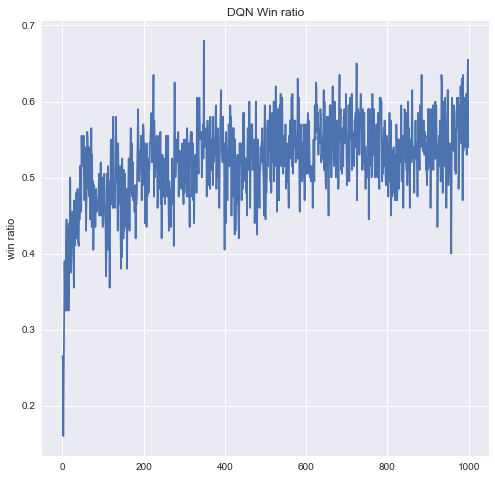

In [19]:
win_array = history['win_ratio']
plt.figure(figsize = (8,8))
plt.title(r"DQN Win ratio")
plt.plot(compute_ratio(win_array,200))
plt.ylabel(" win ratio ")
plt.savefig("dqn.jpg")
plt.show()

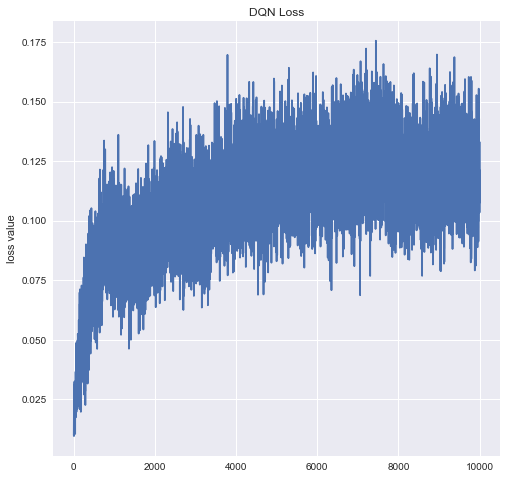

In [21]:
plt.figure(figsize = (8,8))
plt.title(r"DQN Loss")
plt.plot(compute_ratio(history['loss']))
plt.ylabel(" loss value ")
plt.savefig("dqn_loss.jpg")
plt.show()

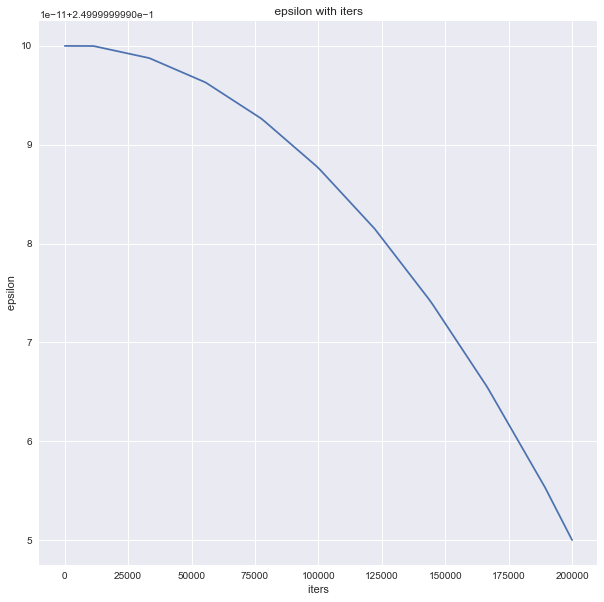

In [23]:
plt.figure(figsize = (10,10))
plt.title(" epsilon with iters ")
plt.plot(history['epsilon'])
plt.xlabel(" iters ")
plt.ylabel(" epsilon ")
plt.savefig("epsilon.jpg")
plt.show()

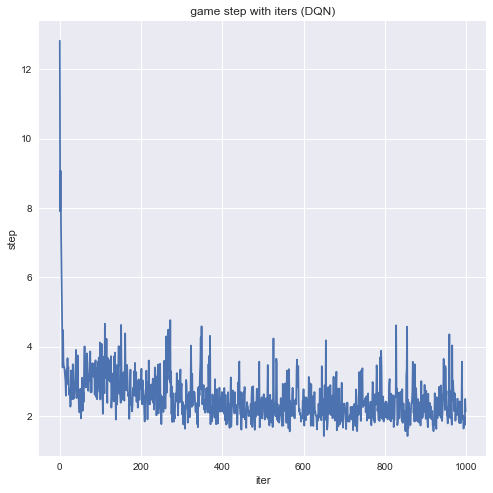

In [25]:
plt.figure(figsize = (8,8))
plt.title(" game step with iters (DQN) ")
plt.plot(compute_ratio(history['step'],200))
plt.xlabel("iter")
plt.ylabel("step")
plt.savefig("game_step_dqn.jpg")
plt.show()